# Project : Danceability classifier
    Kinga Jenei and Jonna Marie Matthiesen

# Project Description

The goal of this project is to build a classifier for the danceability of songs. Based on 12 different song features, such as acousticness, energy and liveness, we want to classify a song as danceable or not-danceable in order to be able to select the best songs for a party.

**End-use cases** \
There are several end-use cases for this classifier. For example, as mentioned in the previous paragraph, a party organizer can use our classifier to create the perfect dance playlist. 
\
Another end-use case would be the production and creation of new songs. Current artists and producers can use the classifier to predict the party suitability of the song they are producing. Many attributes of the classifier are song features that can be derived directly from the track [e.g., duration, loudness, time signature and mode]. Other features, like energy, speechiness, and valence, can be manually determined by the artist/ producers by applying their domain knowledge and expertise. 

## Content
In the first part of this report, we will explore our dataset in great detail. 

**Data specification** \
We will first explore every feature by describing what each column of our tabular data holds. In this section, it is also described how we collected our data and how we decided on the danceability of a track (ground truth labels). 

**Descriptive Analysis** \
After describing the data in general, we will explore our dataset by visualizing different features and especially by calculating the correlation of the danceability feature with all other features. Based on the correlation coefficient we will put a greater emphasis on those features which are highly correlated with the danceability of a track.\
We will first visualize the dataset by using histograms for numerical data and bar plots + pie charts for categorical data. Secondly, we will analyse the dependence of some features in connection with the danceability of tracks.

**Probability Distribution**\
In the third part of this report, we will analyse three features in greater detail: loudness, energy, and valence. We will use probability distributions to describe these selected variables and find theoretical distributions that fit the variables best.

**Hypothesis testing**\
Based on the extensive visualization of our variables in the previous parts we will derive some interesting hypotheses and test those hypotheses.

**Predictive Analysis**\
After exploring the dataset we are ready to apply two predictive machine learning models to solve our problem of finding the best songs for a party. We will use the models *k-Nearest Neighbors* and *decision tree*. We will evaluate the performance of both classifiers and finally decide on one classifier. 

# Setup

In [4]:
# libraries and basic settings

# basics
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import itertools

# models
from sklearn.model_selection import train_test_split
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# decision tree plots
from dtreeviz.trees import *

# mosaic plot
from statsmodels.graphics.mosaicplot import mosaic

# remove all warnings
import warnings
warnings.filterwarnings("ignore")

# plot setup
plt.style.use('seaborn-darkgrid')
import matplotlib.pylab as pylab
params = {'legend.fontsize': 14,
        'figure.figsize': (9*1.6, 9),
        'axes.labelsize': 16,
        'axes.titlesize':16,
        'xtick.labelsize':12,
        'ytick.labelsize':12}
pylab.rcParams.update(params)

# printing
from IPython.display import Markdown, display

In [5]:
# print using markdown style
def print_md(string, color=None):
    if color:
        string = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(string))#colorstr))

In [6]:
# print a dictionary as a table
def print_dict(dictionary, key, value):
    string = ""
    string += f"|{key}|{value}|\n"
    string += "|:---:|:---:|\n"

    for k, v in dictionary.items():
        string += f"|{k}|{v}|\n"
       
    print_md(string)

In [7]:
# load data
spotify_df = pd.read_csv("spotify.csv")
spotify_df

,track_id,artist_name,track_name,duration_ms,acousticness,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,danceability
0,5Smmg9SpxnawbuYPKSNcmx,Bill Charlap Trio,Day Dream,373840,0.90900,0.0951,0.890000,1,0.1170,-23.511,1,0.0388,100.265,4,0.0930,0
1,3UeNIqq0ujRBtJOrqxJcMj,The Uptown Players,Solitude,150597,0.97300,0.0841,0.962000,5,0.0995,-20.033,0,0.0319,105.973,4,0.1590,0
2,1D7BVIjNGLW0dBlD5NEmev,CMC 3,Everything To Me,324250,0.94300,0.1620,0.897000,3,0.1780,-17.787,1,0.0437,178.721,3,0.1530,0
3,7Imv2O9gkwpZJcjKEcSqZ1,Keith Jarrett Trio,You've Changed,493186,0.88600,0.1290,0.852000,8,0.1320,-26.813,1,0.0467,107.853,4,0.1850,0
4,2PVMfghJc3ayLHjGbGjg3J,Martin Landström,Clear as Autumn Nights,301500,0.71600,0.1350,0.020100,5,0.0822,-17.955,0,0.0338,104.020,4,0.0931,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,7I4tSvgf0nNz43r3u24Zla,Clément Bindzi,Together,167346,0.10300,0.5870,0.000291,1,0.0853,-8.671,0,0.0896,122.945,4,0.5750,1
1355,1pKYYY0dkg23sQQXi0Q5zN,Daft Punk,Around the World,429533,0.00356,0.7950,0.889000,7,0.0906,-5.311,1,0.1500,121.294,4,0.8410,1
1356,3hWfKBt3n7j1xqIy6LA5ve,Vicetone,Astronomia,198095,0.00561,0.9450,0.915000,5,0.4390,-2.634,1,0.0960,126.093,4,0.3260,1
1357,03yzZv8ccMLkEqnnMUaf2p,DJ Fluke,Give it Back,157862,0.00983,0.8920,0.127000,6,0.1440,-4.572,0,0.0484,123.940,4,0.2490,1


## Data Cleaning

Check for invalid data.

In [8]:
# key
key_dict = {-1: 'no key detected', 
    0: 'C', 
    1 : 'C#/Db',
    2: 'D',
    3: 'D#/Eb',
    4: 'E',
    5: 'F',
    6: 'F#/Gb',
    7: 'G',
    8: 'G#/Ab',
    9: 'A',
    10: 'A#/Bb',
    11: 'B'}

# time_signature
time_signature_dict = {1 : "1/4",
    2 : "2/4",
    3 : "3/4", 
    4 : "4/4", 
    5 : "5/4", 
    6: "6/4", 
    7 : "7/4"}

# mode
mode_dict = {0 : 'minor', 
    1 : 'major'}

In [9]:
def data_cleaning(df):
    # acousticnes, energy, instrumentalness, liveness, speechiness, valence: between 0.0 and 1.0
    # key: in key_dict
    # mode: in mode_dict
    # time_signature: in time_signature_dict
    # duration_ms: > 0
    # tempo: > 0
    
    invalid_df = df[(df['acousticness']<0.0) & (df['acousticness']>1.0) |
                    (df['energy']<0.0) & (df['energy']>1.0) |
                    (df['instrumentalness']<0.0) & (df['instrumentalness']>1.0) |
                    (df['liveness']<0.0) & (df['liveness']>1.0) |
                    (df['speechiness']<0.0) & (df['speechiness']>1.0) |
                    (df['valence']<0.0) & (df['valence']>1.0) |
                    
                    ~(df['key'].isin(key_dict)) |
                    ~(df['mode'].isin(mode_dict)) |
                    ~(df['time_signature'].isin(time_signature_dict)) |
                    (df['duration_ms'] <= 0.0) |
                    (df['tempo'] <= 0.0) ]
    
    correct_df = pd.concat([df, invalid_df]).drop_duplicates(keep=False)
    
    return correct_df, invalid_df

In [10]:
spotify_df, invalid_df = data_cleaning(spotify_df)

In [11]:
print(f'Number of valid data: {len(spotify_df)}')
print(f'Number of invalid data: {len(invalid_df)}')

Number of valid data: 1359
Number of invalid data: 0


## Train-Test split

We are doing an 80-20 train-test split, meaning 80% of the data will be used for training, and 20% of the data will be used for the final testing.

In [12]:
spotify_df, test_df = train_test_split(spotify_df, test_size = 0.2, random_state = 0, shuffle = True)

In [13]:
print(f'Number of train data: {len(spotify_df)}')
print(f'Number of test data: {len(test_df)}')

Number of train data: 1087
Number of test data: 272


# Data specification

## Data collection

We have collected the data for this project ourselves by using the Spotify API. *"Spotify is a digital music, podcast, and video service that gives [you] access to millions of songs and other content from creators all over the world."* (Spotify, What is Spotify? (webpage) URL : https://support.spotify.com/us/article/what-is-spotify/ ; last visited : 04/01/2021 ). Descriptions of the API itself and the derived song features can be found at 

Spotify for Developers (webpage) URL : https://developer.spotify.com/ ; last visited : 25/11/2021

We have chosen the songs of our dataset in the following way: \
Since our goal is to create a classifier for the danceability of songs we have picked songs from dance / party playlists on Spotify (by choosing playlist from the Spotify category "party") and gave those songs the ground truth label 1 (danceable). For non-danceable songs, we picked a collection of playlists from various Spotify categories and gave those songs the ground truth label 0 (not-danceable). When a song appeared in two different playlist categories ("party" and "non-party") we classified this song as danceable. \
This labelling method has some flaws since we don't check every song individually. In the last part of this report (Conclusion) we will critically evaluate how we collected our data and how this process could be improved.   

It is to mention that due to the always-changing preference regarding party- and dance-songs over the decades, the ground truth labels of our dataset are not valid forever. Instead, the following analysis of the dataset in connection with the danceability of a track represents only the *current* preferences given the chosen playlists.

## Data description

In [14]:
def extract_song(description, df, feature, func):
    song_df = df[df[feature] == func(df[feature])]
    
    print_md("**"+description+"**")
    print("To listen to the song:" " https://open.spotify.com/track/"+str(song_df.track_id.values[0]))
    print('Artist:', song_df.artist_name.values[0])
    print('Track:', song_df.track_name.values[0])
    print(feature + ': {:1.5f}'.format(song_df[feature].values[0]))

### Target

**danceability**

> integer , number in $\{0, 1\}$ ; Categorical - Nominal data

Index which indicates if a track is danceable (1) or not (0). A track is classified as danceable if it appears in one of the selected Spotify party-playlists (see data collection).

| danceability value | description |
| :---: | :---: |
| 0 | track is unlikely to be danceable -> track is not suitable for a party |
| 1 | track is likely to be danceable -> track is probably suitable for a party |

### Input

**track_id**

> string ; Categorical - Nominal data

Unique id of the song / track.

**artist_name**

> string ; Categorical - Nominal data

The name of the artist.

**track_name**

> string ; Categorical - Nominal data

The name of the track.

**duration_ms**

> integer ; Numerical - Discrete (interval) data

Duration of the track in milliseconds (ms).

**acousticnes**

> float, number in [0.0, 1.0]; Numerical - Continuous data

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

In [15]:
extract_song('Example of an acoustic song', spotify_df, 'acousticness', max)

**Example of an acoustic song**

To listen to the song: https://open.spotify.com/track/6lz4vzv0JlD73qeKW5qsUT
Artist: Benjamin Gustafsson
Track: I Heard You From Afar
acousticness: 0.99400


In [16]:
extract_song('Example of a not acoustic song', spotify_df, 'acousticness', min)

**Example of a not acoustic song**

To listen to the song: https://open.spotify.com/track/636kRUoh1D1ZJifHip4RtS
Artist: Love Regenerator
Track: Rollercoaster
acousticness: 0.00004


**energy** 

> float, number in $[0.0, 1.0]$ ; Numerical - Continuous data

Energy represents a perceptual measure ( e.g. a quantity measurement which relates to human perception and interpretation) of intensity and activity. This includes perceptual features like dynamic range, perceived loudness, timbre (perceived sound quality), ... . Typically, energetic tracks feel fast, loud, and noisy. 

high energy $\sim$ high intensity and activity

**instrumentalness** 

> float, number in $[0.0, 1.0]$ ; Numerical - Continuous data

The closer the value to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

E.g. rap or spoken word tracks are clearly "vocal".

**key**

> integer, number in $[-1, 11]$ ; Categorical - Ordinal data

The key the track is in. See the following table for the mapping. The mapping follows standard pitch class notation.

In [17]:
print_dict(key_dict, 'key', 'pitch')

|key|pitch|
|:---:|:---:|
|-1|no key detected|
|0|C|
|1|C#/Db|
|2|D|
|3|D#/Eb|
|4|E|
|5|F|
|6|F#/Gb|
|7|G|
|8|G#/Ab|
|9|A|
|10|A#/Bb|
|11|B|


**liveness** 

> float, number in $[0.0, 1.0]$ ; Numerical - Continuous data

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness**
> float ; Numerical - Continuous data

The overall loudness of a track in decibels (dB). Loudness values are <span style="color:blue">averaged</span> across the entire track. The values typically range between -60 and 0 dB. 

*Strongly simplified:* the closer the value is to 0, the louder the track.

Examples of different noise levels (not averaged):

| decibels (dB) | Noise source |
| :--------: | :--------: |
|120 - 129 dB | Sports crowd, rock concert, loud symphony|
|106 - 115 dB | chain saw|
| 90 - 95 dB | Subway, shouted conversation|
|75 dB | vacuum cleaner|
| 60 dB | normal conversation|
| 40 dB | average home noise|

source: HealthLinkBC (webpage) URL : https://www.healthlinkbc.ca/health-topics/tf4173 ; last visited : 25/11/2021

In [18]:
extract_song('Example of a "silent" song', spotify_df, 'loudness', min)

**Example of a "silent" song**

To listen to the song: https://open.spotify.com/track/6lz4vzv0JlD73qeKW5qsUT
Artist: Benjamin Gustafsson
Track: I Heard You From Afar
loudness: -33.33100


In [19]:
extract_song('Example of a loud song', spotify_df, 'loudness', max)

**Example of a loud song**

To listen to the song: https://open.spotify.com/track/5YPMEOJ58kfl56VHxTgwx3
Artist: David Guetta
Track: Play Hard (feat. Ne-Yo & Akon)
loudness: -1.70200


**mode**

> integer ;  Categorical - Ordinal data

Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. The mode feature is an additional feature of the key feature: A track can have a major key or minor key.

In [20]:
print_dict(mode_dict, 'value', 'mode')

|value|mode|
|:---:|:---:|
|0|minor|
|1|major|


**speechiness**

> float ; Numerical - Continuous data

Speechiness detects the presence of spoken words in a track. The value of speechiness ranges from 0.0 to 1.0. 

|speechiness value x|description|
|:---:|:---:|
|$0.66 < x$ | tracks that are probably made entirely of spoken words (e.g., podcasts, audio book, poetry)|
| $0.33 < x \leq 0.66$ | tracks that may contain both music and speech, either in sections or layered (e.g., rap music)|
|$ x \leq 0.33$ | most likely music and other non-speech-like tracks|


**tempo** 

> float; Numerical - Continuous data

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

|tempo value x|description|
|:---:|:---:|
|$x \leq 85$ | slow song|
| $85 < x < 120$ | song with moderate speed |
|$ 120 \leq x $ | fast song |

In [21]:
extract_song('Example of a slow song', spotify_df, 'tempo', min)

**Example of a slow song**

To listen to the song: https://open.spotify.com/track/05IRllaVkCLy5Iyz3JUXNC
Artist: Bladverk Band
Track: Caerulea
tempo: 54.72700


In [22]:
moderate_song = spotify_df[(spotify_df.tempo>85) & (spotify_df.tempo<120)].sample(1)
extract_song('Example of a song with moderate speed', moderate_song, 'tempo', min)

**Example of a song with moderate speed**

To listen to the song: https://open.spotify.com/track/5f1joOtoMeyppIcJGZQvqJ
Artist: Kane Brown
Track: Be Like That - feat. Swae Lee & Khalid
tempo: 86.97000


In [23]:
extract_song('Example of a fast song', spotify_df, 'tempo', max)

**Example of a fast song**

To listen to the song: https://open.spotify.com/track/7DhvNzyMM8jJWcfykG3psB
Artist: Dustin Lynch
Track: Thinking 'Bout You (feat. MacKenzie Porter)
tempo: 203.80300


**time_signature**

> integer, number $\geq 1$ ; Numerical - Discrete data 

An estimated time signature. The time signature usually ranges from 3 to 7 indicating time signatures of "3/4" to "7/4".

Example: A time signature of 3 indicates that there are three quarter notes (crotchets) per measure (bar).

In [24]:
print_dict(time_signature_dict, 'value', 'time signature')

|value|time signature|
|:---:|:---:|
|1|1/4|
|2|2/4|
|3|3/4|
|4|4/4|
|5|5/4|
|6|6/4|
|7|7/4|


**valence**

> float, number in $[0.0, 1.0]$ ; Numerical - Continuous data

Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


In [25]:
extract_song('Example of a positive song', spotify_df, 'valence', max)

**Example of a positive song**

To listen to the song: https://open.spotify.com/track/5eJuLdADYsM6IyQ4XkRzMB
Artist: Baba Stiltz
Track: Rodeo
valence: 0.97200


In [26]:
extract_song('Example of a negative song', spotify_df, 'valence', min)

**Example of a negative song**

To listen to the song: https://open.spotify.com/track/2prnn41CblB8B4yWACDljP
Artist: Shouse
Track: Love Tonight - David Guetta Remix Edit
valence: 0.03480


# Descriptive Analysis

We will start by describing the data using sample mean, sample standard deviation, and some quantiles for each feature. We will refer to the following table in the upcoming descriptive analysis.

In [27]:
spotify_df

,track_id,artist_name,track_name,duration_ms,acousticness,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,danceability
983,1nZzRJbFvCEct3uzu04ZoL,Katy Perry,Part Of Me,216160,0.000417,0.918,0.000000,5,0.0744,-4.630,1,0.0355,130.028,4,0.7690,1
884,3KffMs30iYfPNYI8epNj5a,Fred again..,Hannah (The Sun),196796,0.024900,0.878,0.029400,8,0.1470,-4.581,1,0.0648,125.018,4,0.4010,1
1126,2Ld2LehpgQNREMxl9LlIzm,Vengaboys,"Boom, Boom, Boom, Boom!!",202570,0.013400,0.935,0.411000,11,0.0244,-4.595,0,0.0407,138.479,4,0.9680,1
990,0azC730Exh71aQlOt9Zj3y,Calvin Harris,This Is What You Came For (feat. Rihanna),222160,0.199000,0.927,0.119000,9,0.1480,-2.787,0,0.0332,123.962,4,0.4650,1
695,12N23tQKmfGcEO0z8ObwtM,Ed Sheeran,Bad Habits - MEDUZA Remix,194331,0.099200,0.800,0.001320,11,0.0887,-5.102,0,0.0337,126.031,4,0.1920,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,7zx1i0jGcFwMBurajgKlO7,Jonasu,Black Magic,174193,0.056400,0.634,0.000000,8,0.2760,-4.960,1,0.1630,124.074,4,0.4630,1
835,0z6AYlkxOeV39NsttefSm0,Mike Gudmann,Take It Off,135874,0.012300,0.890,0.000011,5,0.1960,-5.730,0,0.3560,194.989,3,0.0864,1
1216,76kkAnqj73aaP5xkrfpWb4,GATTÜSO,When In Rome - Mark Sixma Remix,189843,0.005240,0.854,0.000001,11,0.1270,-5.118,1,0.0928,127.953,4,0.5760,1
559,5esPpmrM2AsyDVgOKzWQwU,Leon Bridges,Beyond,240600,0.229000,0.687,0.000000,6,0.1090,-5.400,1,0.1050,76.014,4,0.1870,0


In [28]:
spotify_df.describe()

,duration_ms,acousticness,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,danceability
count,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000
mean,198720.506900,0.254906,0.650325,0.089929,5.595216,0.171435,-7.154556,0.627415,0.079254,119.563802,3.965961,0.482800,0.489420
std,39076.105961,0.302048,0.227879,0.235261,3.652227,0.125629,4.188219,0.483716,0.087597,23.585382,0.264088,0.227449,0.500118
min,108373.000000,0.000039,0.023700,0.000000,0.000000,0.024400,-33.331000,0.000000,0.022500,54.727000,1.000000,0.034800,0.000000
25%,173675.000000,0.025250,0.539000,0.000000,2.000000,0.096250,-7.941500,0.000000,0.036000,104.008500,4.000000,0.305000,0.000000
50%,193226.000000,0.116000,0.708000,0.000005,6.000000,0.125000,-5.950000,1.000000,0.046500,123.077000,4.000000,0.477000,0.000000
75%,219123.500000,0.388500,0.821000,0.002560,9.000000,0.200500,-4.666500,1.000000,0.074600,128.024000,4.000000,0.659000,1.000000
max,493186.000000,0.994000,0.997000,0.971000,11.000000,0.954000,-1.702000,1.000000,0.723000,203.803000,5.000000,0.972000,1.000000


Our train dataset consists of 1087 tracks. \
Since the danceability feature has a mean of nearly exactly 0.5 (~0.49) we conclude that half of our training set consists of danceable tracks (tracks with danceability = 1).

## Correlation

In [29]:
def corr_matrix(df, title):
    corr = df.corr()

    # triangle heatmap
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    corr[mask] = np.nan

    # change labelsize
    with plt.style.context({'ytick.labelsize':16, 'xtick.labelsize':16}):
        sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt = '.2f', annot_kws={"size": 13})
        plt.title(title, fontsize = 18, pad=16)


def corr_feature(df, feature):
    corr = df.corr()

    # change labelsize
    with plt.style.context({'ytick.labelsize':16, 'xtick.labelsize':16}):
        heatmap = sns.heatmap(
            corr[[feature]].sort_values(by=feature, ascending=False), 
            vmin=-1, vmax=1, annot=True, cmap='coolwarm', annot_kws={"size": 13})
    heatmap.set_title('Features Correlating with ' + feature.title(), fontsize = 18, pad=16)

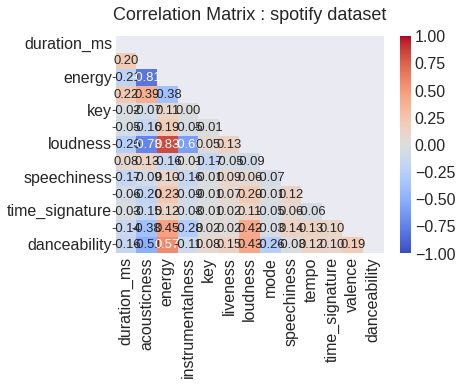

In [30]:
corr_matrix(spotify_df, 'Correlation Matrix : spotify dataset')

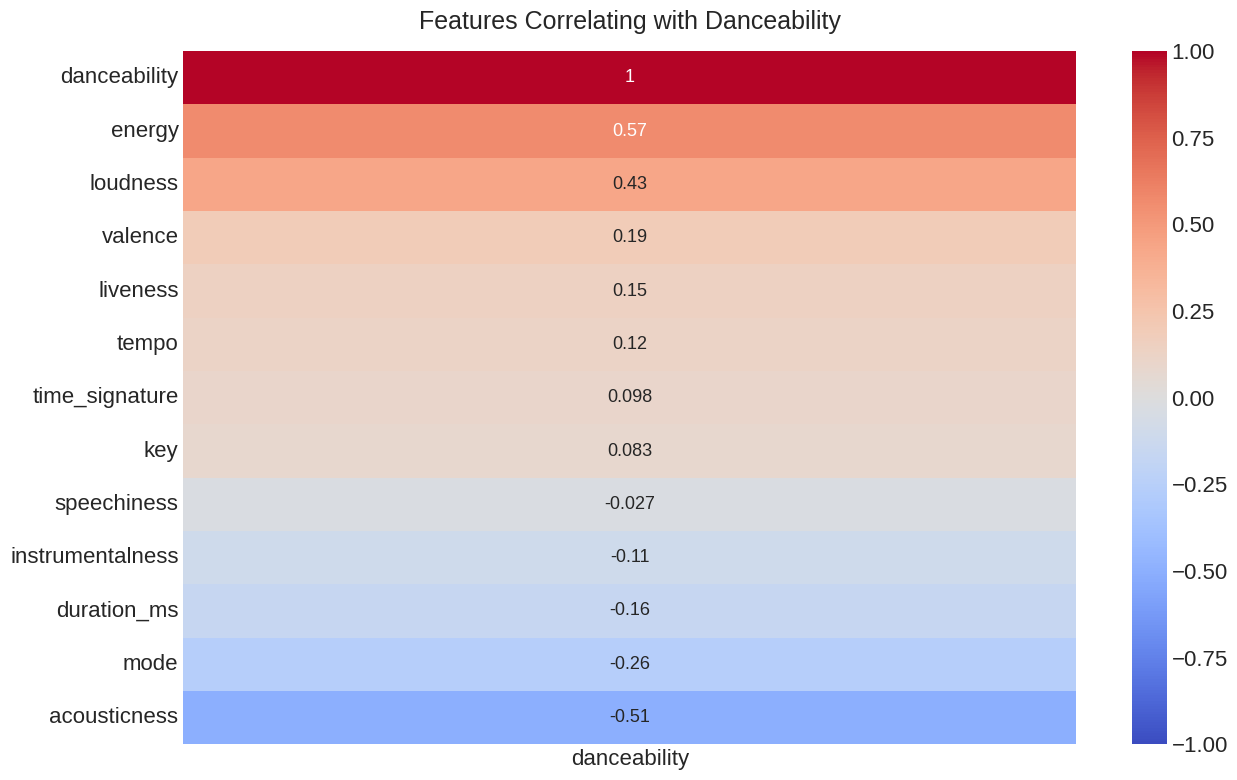

In [31]:
corr_feature(spotify_df, 'danceability')

The above correlation measurement shows that danceability and the features energy, loudness, and acousticness are highly correlated. This reflects our general interpretation / intuition of party songs: We suspect energetic songs (high energy value) to be danceable. Furthermore, since the noise level at parties is generally quite high, we suspect party songs / danceable songs to be louder than the average. These two intuitions are reflected in the positive correlations. 

We also observe from the above plot a negative correlation between danceability and acousticness. *As a reminder:* Acousticness is a confidence measure from 0.0 to 1.0 of whether the track is acoustic - 1.0 represents high confidence the track is acoustic. Intuitively, the negative correlation of danceability and acousticness makes sense - out of experience most party songs appear to be not acoustic / have a low acousticness value.

Given the correlation with danceability, we can distinguish three groups of features. We decided on the following groups based on the given correlations with the aim of having a similar number of features in each group:

|Description | Correlation | Features|
|:---:|:---:|:---:|
|High correlation with danceability $~~$ |   $0.40 \leq~ \mid corr \mid ~\leq 1$ | $~~$ energy, loudness, acousticness |
|Medium correlation with danceability $~~$ |   $0.15 \leq ~ \mid corr \mid ~ < 0.40$ | $~~$ valence, mode, liveness, duration_ms |
|Low correlation with danceability $~~$ |   $0 \leq ~ \mid corr \mid ~< 0.15$ | $~~$ tempo, key, time_signature, speechiness, instrumentalness | 



## Histograms

We will now show the histogram of some selected variables and describe our conclusions from the plots. We will have a look at the following song features: energy, loudness, acousticness since those features are highly correlated with the danceability of tracks. Additionally, we will show the histogram of the features valence (medium correlation), and speechiness (low correlation) in order to plot at least one feature per group.

In [32]:
def histogram_plot(feature, bins = 100, ylabel = "Frequency"):
    ax = spotify_df[feature].plot(kind = "hist", alpha = 0.75, bins = bins) 
    ax.set_xlabel(feature.title())
    ax.set_title(f'Distribution of the {feature} of tracks')
    ax.set_ylabel(ylabel)
    plt.show()

### Energy

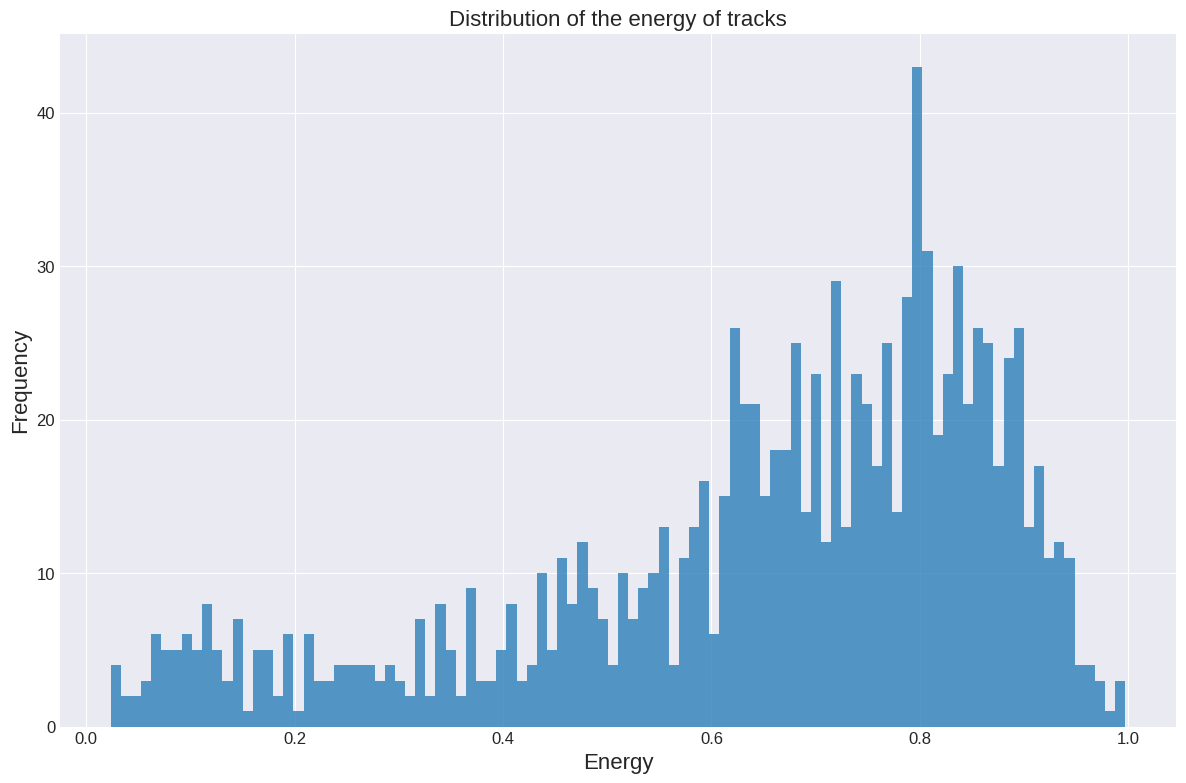

In [33]:
histogram_plot('energy')

In the above histogram of the energy feature, we can determine two modes: One mode around 0.8 and another around 0.1. This observation reflects our chosen playlists from Spotify. We collected songs from dance - playlists and also from chill - playlist. By intuition, one would suspect chill songs to have a low(er) energy. Also, as we have seen before, the features energy and danceability are strongly positively correlated which might result in a higher frequency of energetic songs in our data since half of our data are danceable tracks. 

### Loudness

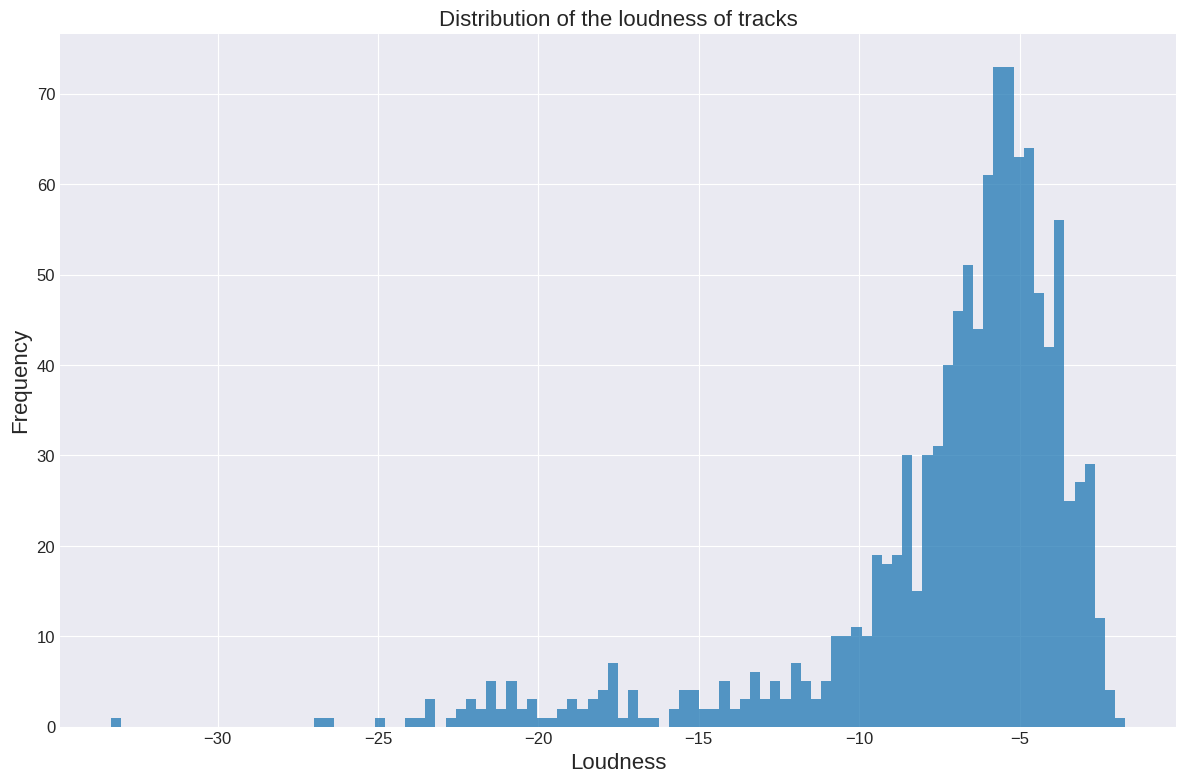

In [34]:
histogram_plot("loudness")

The above plot of the distribution of the loudness of tracks shows a unimodal distribution with most values centred around -7.15 and a standard deviation of about 4.2. Since our plot is negatively skewed most of our selected data can be classified as loud. *Reminder: the closer the value is to 0, the louder the track [simplified definition of the loudness feature].* This distribution makes sense since we are dealing with songs and songs are in general louder than for example audiobooks or podcasts - the range of the loudness feature of tracks includes for example podcasts and other spoken audio which can be classified as 'silent'. 

### Speechiness

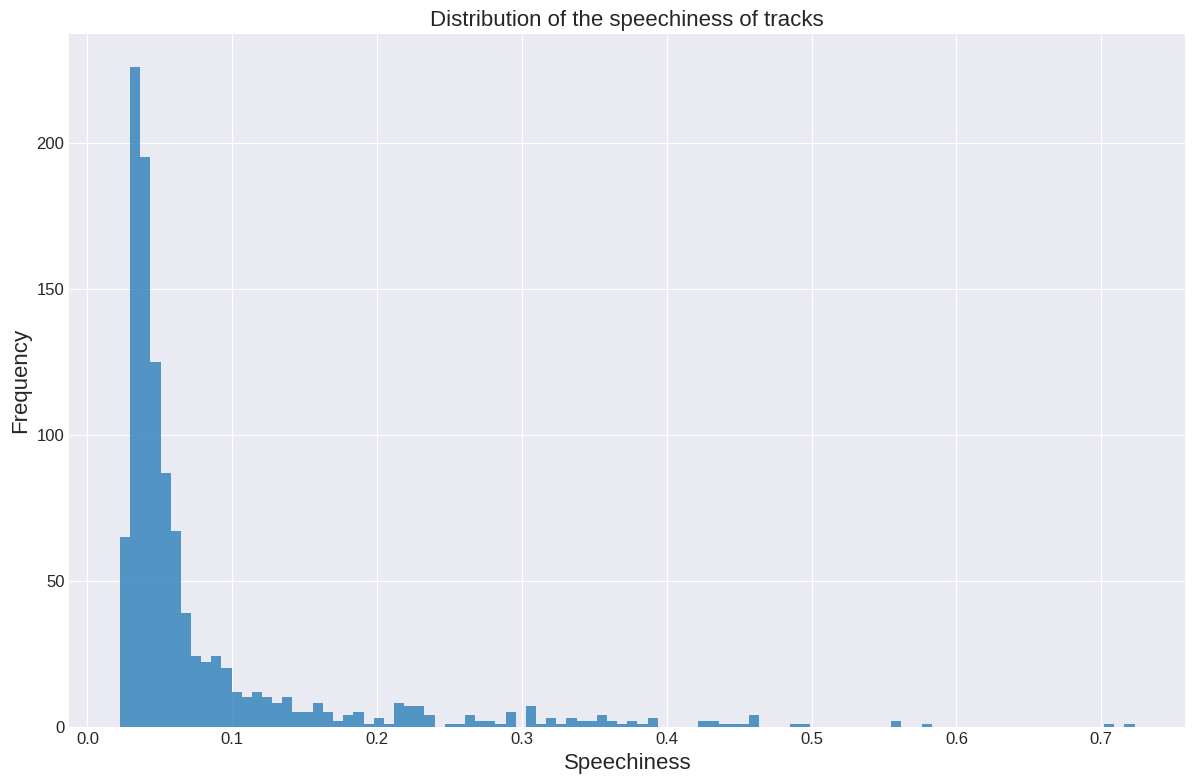

In [35]:
histogram_plot("speechiness")

The above plot shows a unimodal distribution of the speechiness feature with most of the values centered around 0.08 (mean). As expected from the definition of the speechiness column we mainly have tracks with a low speechiness value (close to 0), i.e. few spoken words. 

*Definition of speechiness:* $ x \leq 0.33$ - most likely music and other non-speech-like tracks.

Even though we are only dealing with music, our data set includes some tracks with a speechiness value of above 0.5. We will now have a closer look at the outlier on the far right-hand side with a speechiness value of above 0.7:

In [36]:
extract_song('Example of a track with a high speechiness value', spotify_df, 'speechiness', max)

**Example of a track with a high speechiness value**

To listen to the song: https://open.spotify.com/track/0W7brFokN6QtGRNp32RCQP
Artist: Arz
Track: Alone With You
speechiness: 0.72300


The given song "Alone With You" from Arz is a Hip-Hop/Rap - song with many clearly spoken words. 

### Acousticness

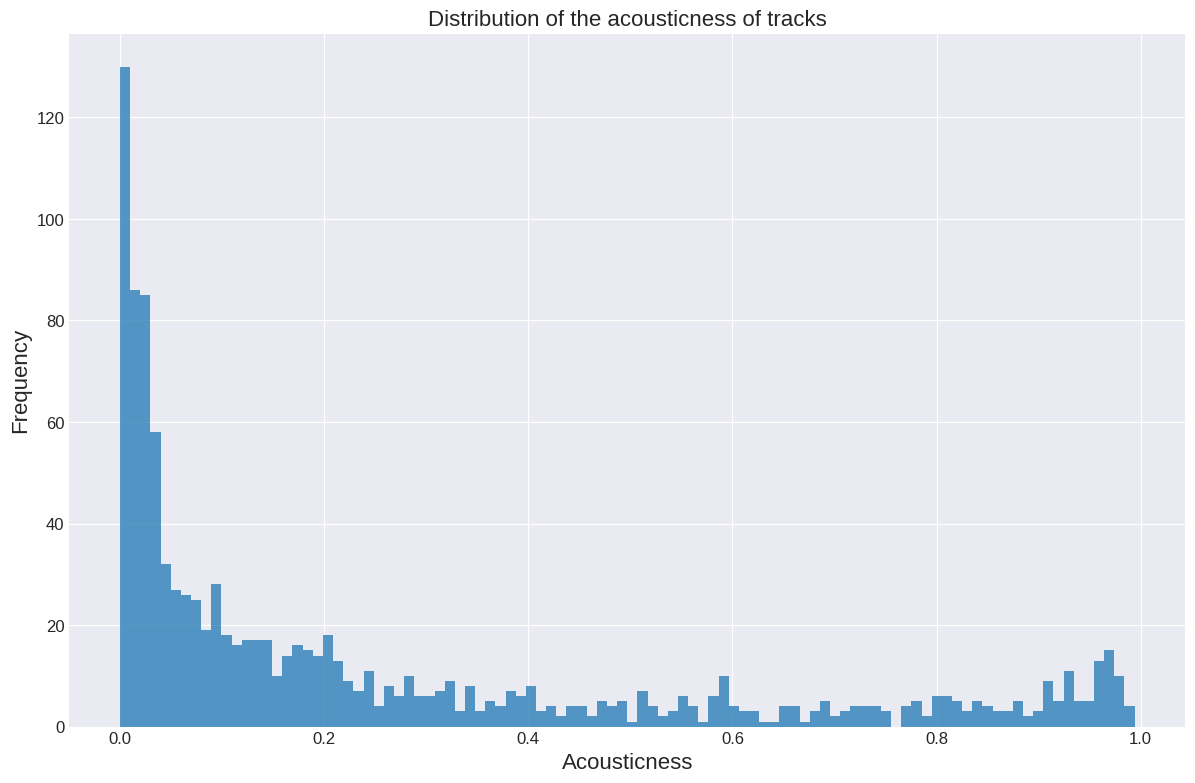

In [37]:
histogram_plot("acousticness")

The acousticness of our data ranges from 0.0 to 1.0 and covers the whole range of the acousticness feature. This observation is a result of our data selection which covers tracks from all kinds of genres.

*1.0 : very high confidence the track is acoustic.* \
*0.0 : very low confidence the track is acoustic.*

We can identify two modes: one mode close to 1 and the other close to 0. As described before, we assume danceable tracks not to be acoustic / to have a low acousticness measure. Since half of our data consists of tracks classified as danceable we expect a high frequency of tracks with low acousticness. 

Later on, we will analyze this observation in more detail and especially check, if the mode around 0 is due to the fact that half of our data is danceable.

### Valence

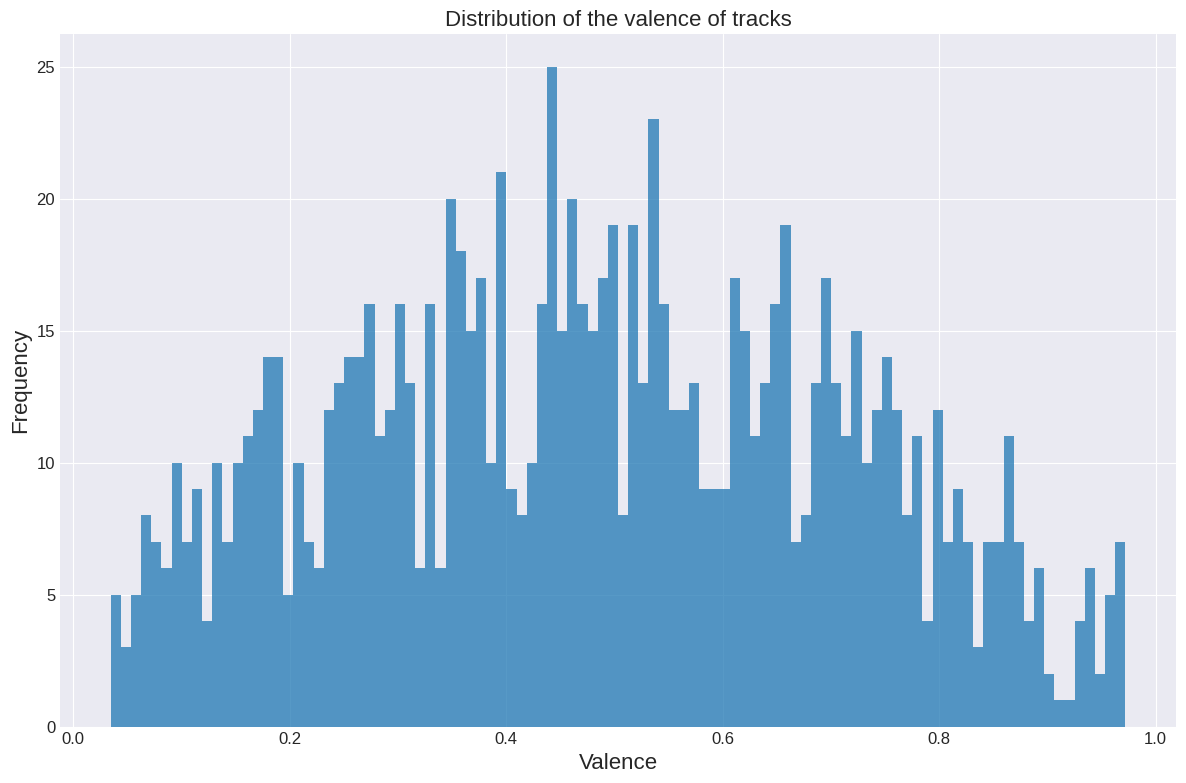

In [38]:
histogram_plot("valence")

The histogram of the valence feature shows a unimodal, symmetric distribution, centred around 0.48 (mean) and with a standard deviation of 0.23. This distribution shows that we have collected a variety of positive, negative and neutral tracks, with similar amounts of positive and negative tracks. 

*Reminder: Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).*


 ## Barplots & Pie charts

We will now have a closer look at categorical features by plotting their distributions using bar plots and pie charts. We have selected the following features from two correlation - groups:

**medium correlation:** mode

**low correlation:** key, time signature

In [39]:
def barplot_piechart(data, title):
    colors = plt.get_cmap('Paired')(np.arange(len(data), dtype=int))
    plt.subplot(1,2,1)
    plt.pie(x=data, autopct='%1.1f%%', labels=list(data.keys()), shadow=False,
            colors = colors,
            textprops={'fontsize': 12}, pctdistance=0.8)
    plt.title("Distribution of the "+title+" of tracks", fontsize = 14)

    # horizontal bar chart
    plt.subplot(1,2,2)
    plt.title(title+": Counts", fontsize = 14)
    data.plot.barh(alpha = 0.75, fontsize = 12, figsize = (8*1.6, 8), color = colors)
    plt.tight_layout()

### Key

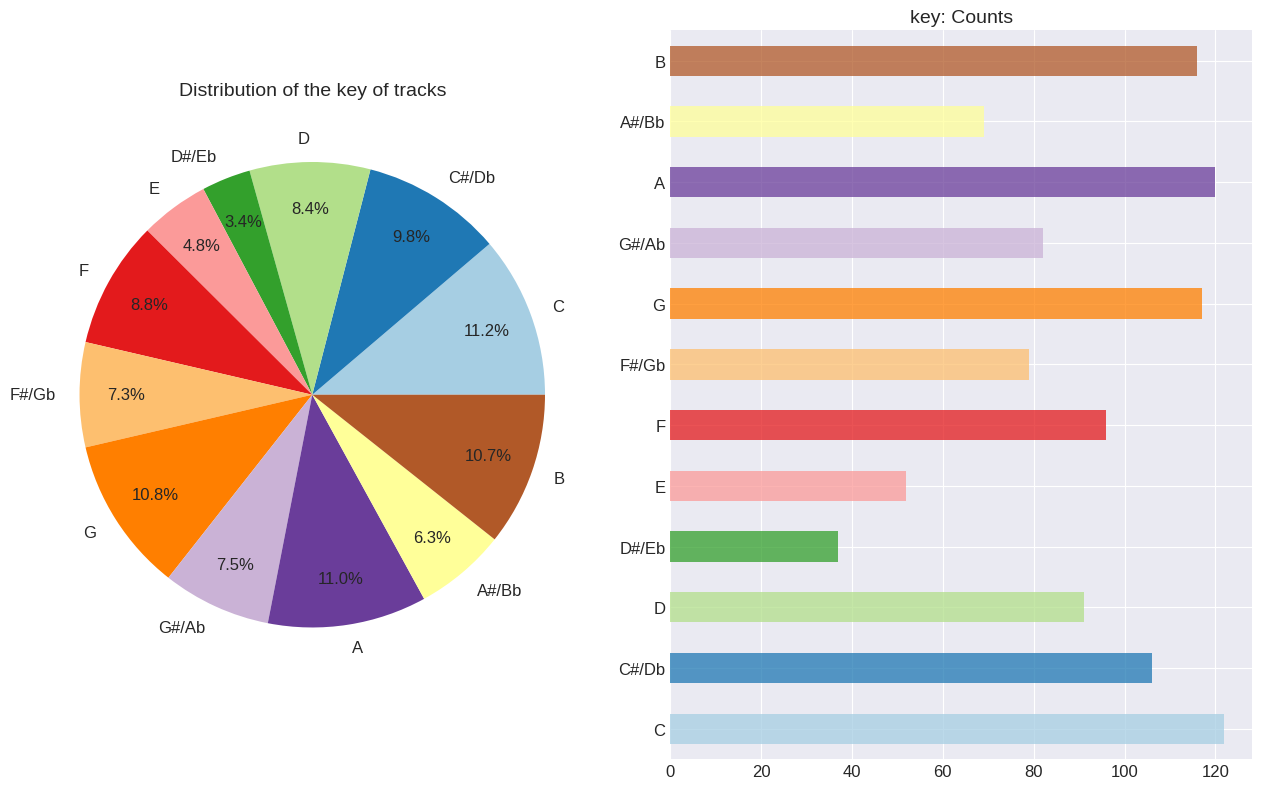

In [40]:
key_series = spotify_df.key.value_counts().sort_index().rename(index=key_dict) 
barplot_piechart(key_series, 'key')

In [41]:
key_series.describe()

count     12.000000
mean      90.583333
std       27.792930
min       37.000000
25%       76.500000
50%       93.500000
75%      116.250000
max      122.000000
Name: key, dtype: float64

The above plots show that counts of the key of tracks range from 37 to 122 with a mean of about 90. The keys B, A, G, and C occur most frequently (above 10% each) while the keys E, and D#/Eb occur the least (below 5% each).
Since the distributions of the keys are more or less evenly distributed we can not determine a specific trend for this feature.

### Time signature

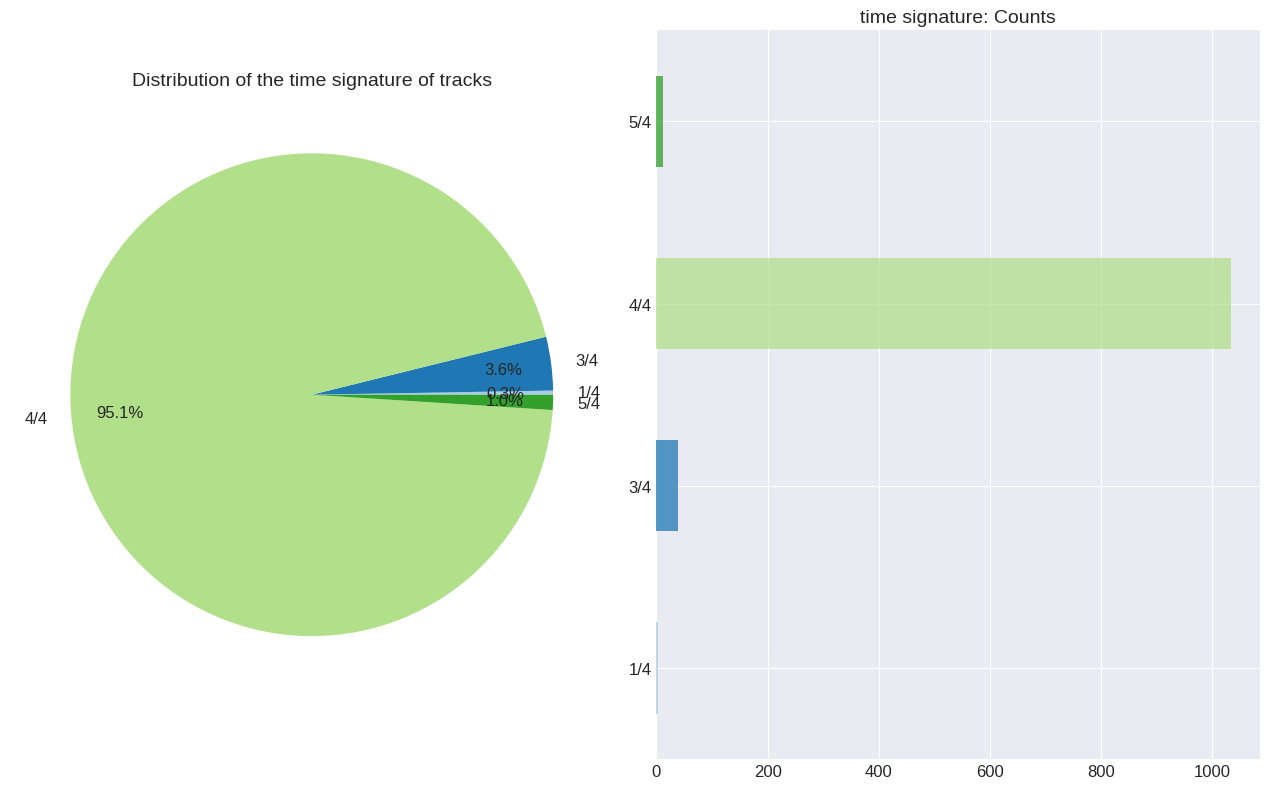

In [42]:
time_signature_series = spotify_df.time_signature.value_counts().sort_index().rename(index=time_signature_dict) 
barplot_piechart(time_signature_series, 'time signature')

The above plots show that most tracks have an estimated time signature of 4/4 (above 95% of the tracks) and just a few tracks deviate from this trend with an estimated time signature of 5/4, 3/4 or 1/4. These plots reflect the popularity of the 4/4 time signature for songs. As a fact, most western music is written in 4/4 which is a regular and simple beat pattern.

source: "Time signatures explained" (webgpage) ; url: https://www.skoove.com/blog/time-signatures-explained/ ; latest visit: 08/12/2021

### Mode

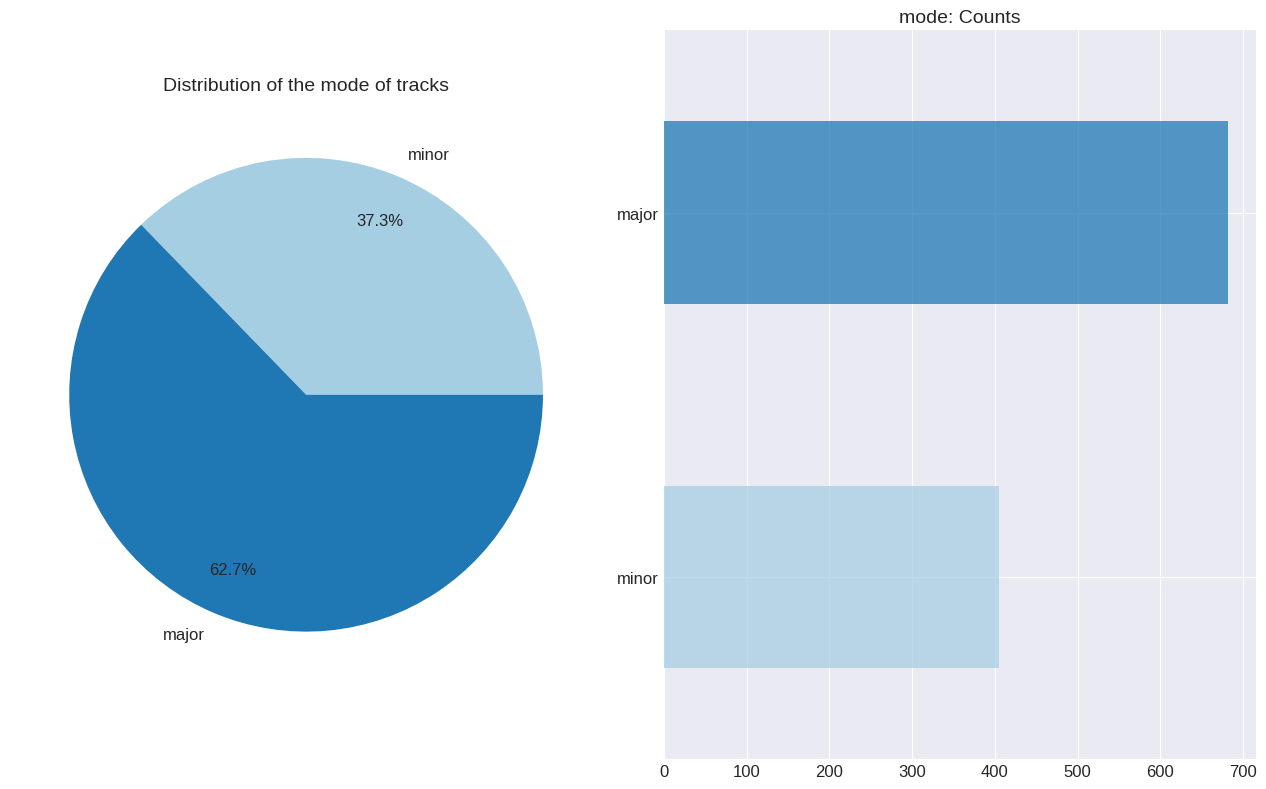

In [43]:
mode_series = spotify_df['mode'].value_counts().sort_index().rename(index=mode_dict)
barplot_piechart(mode_series, 'mode')

The mode of tracks is either major or minor. We can derive from the above plots that most of the tracks have a major key (above 60%). 
We will shortly analyse the dependence between the mode of a track and the danceability in more detail.

## Dependence

In the following, we will analyze the dependence of the features acousticness, energy, loudness, mode, and danceability since those features strongly correlate with danceability.

In [44]:
def dependance_scatter_plot(feature1, feature2):
    df = spotify_df.copy()
    
    fig, ax = plt.subplots()

    ax.scatter(
        df[df.danceability == 1][feature1],
        df[df.danceability == 1][feature2],
        alpha = 0.75,
        label="Danceability = 1",
        facecolor="green")

    ax.scatter(
        df[df.danceability == 0][feature1],
        df[df.danceability == 0][feature2],
        alpha = 0.75,
        label="Danceability = 0",
        facecolor="blue")

    ax.set_xlabel(feature1.title())
    ax.set_ylabel(feature2.title())
    ax.set_title(feature1+" vs. " + feature2 + " of Songs")
    ax.legend()

    plt.show()

In [45]:
def groupby_std(df, feature_list):
    print(f"Standard deviation of the features {feature_list[0]} and {feature_list[1]}.\n")
    return df.groupby(["danceability"])[feature_list].std()

### Acousticness vs. Energy

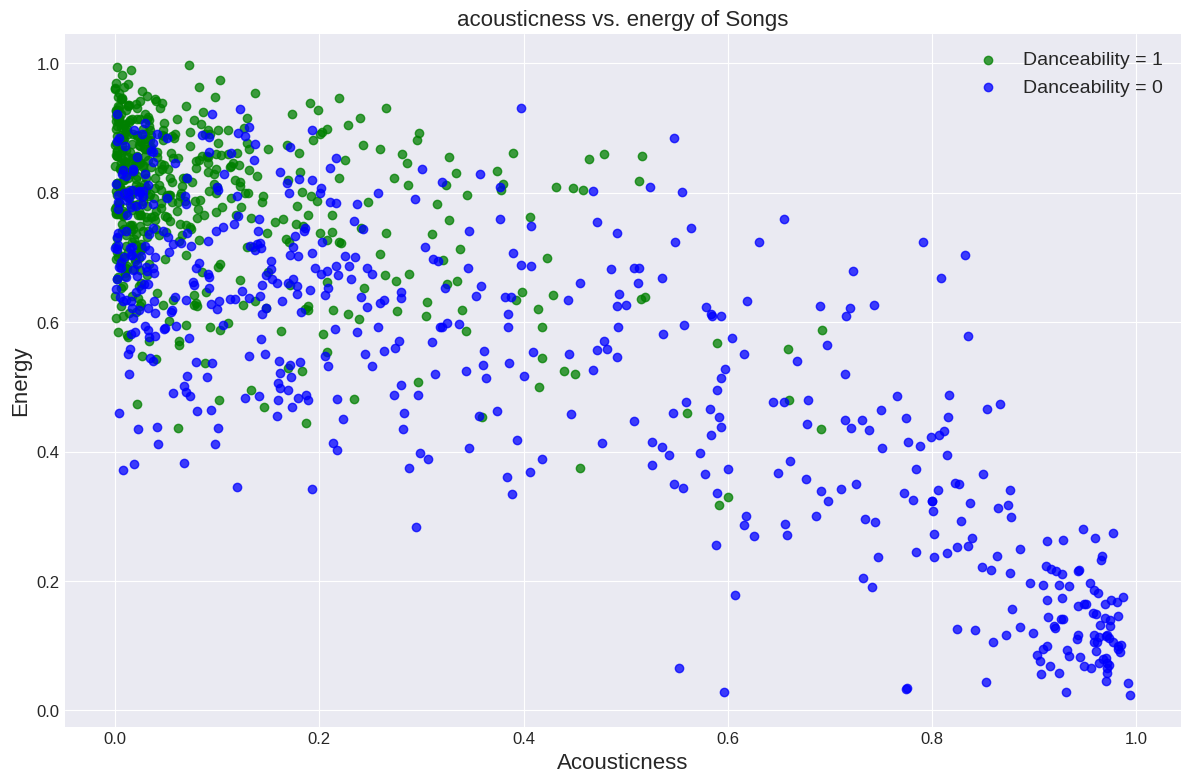

In [46]:
dependance_scatter_plot('acousticness', 'energy')

The above plot shows the dependence of the three features energy, acousticness, and danceability. We can derive from the plot that most danceable songs in our dataset have high energy and a low acousticness value [most of the green dots which represent danceable tracks are scattered in the top left corner]. 
On the other hand, non-danceable tracks seem to appear in all ranges of acousticness and energy. They appear most frequently for high energy + low acousticness and vice versa (i.e. low energy + high acousticness). \
Again, out of intuition and experience, we assume energetic songs to be less acoustic and vice versa, which might be a justification for the given distribution - the negative relationship of energy and acousticness.

In connection to the histograms of the features energy and acousticness we assumed the high frequency of energetic songs / non-acoustic songs to be due to the data selection, i.e. the fact that half of our data is danceable. The given scatter plot strengthens this assumption as described before.

### Acousticness vs. Loudness

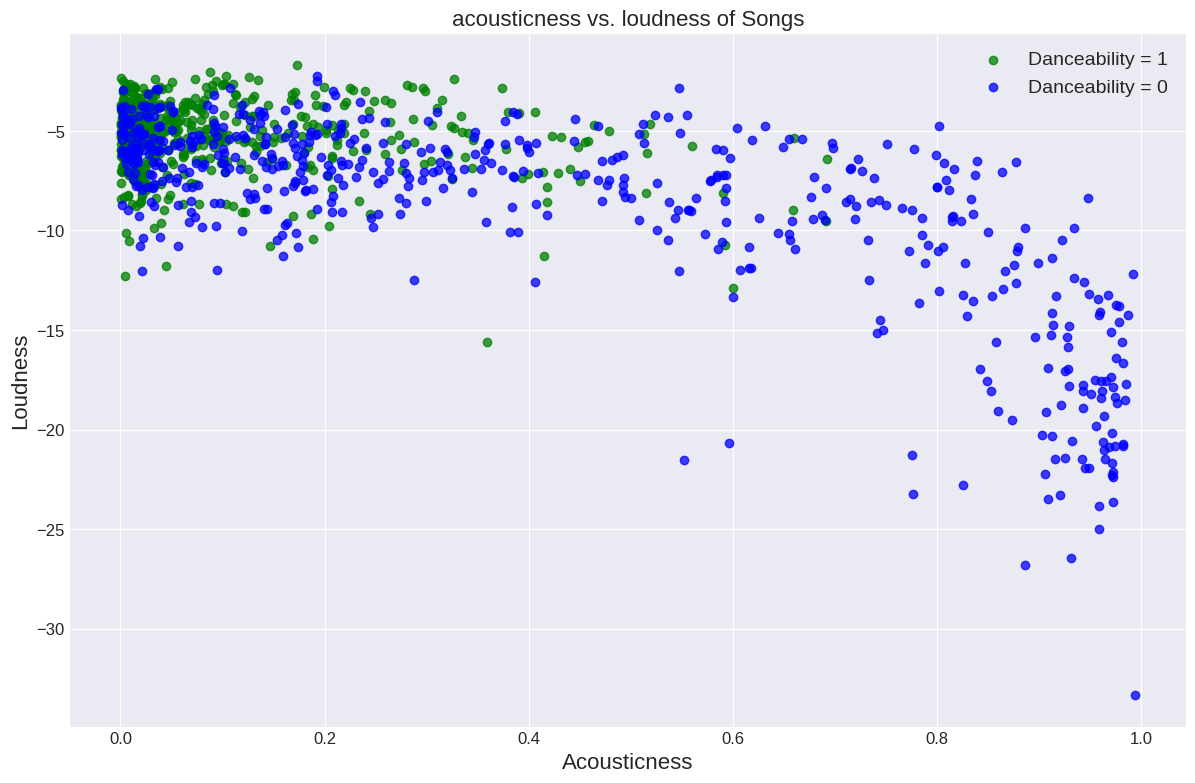

In [47]:
dependance_scatter_plot('acousticness', 'loudness')

The given scatter plot shows the dependence of the features loudness, acousticness, and danceability of tracks. Once again, we can determine a trend of danceable tracks: most danceable tracks are scattered in the top-left corner of the plot (high loudness and low acousticness). Non-danceable songs are scattered more widely and cover a greater range of the acousticness and loudness values. For non-danceable tracks, we can also spot a cluster in the top-left corner. 

The variance of the loudness of danceable tracks seems much smaller than the variance of the acousticness of danceable tracks. To check this assumption we will take a look at the reduced data set consisting only of danceable songs:

In [48]:
groupby_std(spotify_df, ['loudness', 'acousticness'])
# show using "raw output"

Standard deviation of the features loudness and acousticness.



,loudness,acousticness
danceability,,
0,4.974427,0.341573
1,1.824767,0.131030


As we can see in the table above, the standard deviation (square root of the variance) of the loudness of danceable tracks is more than 10 times bigger than the  standard deviation of the acousticness of danceable tracks. 

As mentioned in the section "Histograms", we assume that more people dance to non-acoustic songs. This assumption is underlined by the two scatter plots above. We want to test this hypothesis using a t-test in the upcoming section "Hypothesis Testing". 

### Energy vs. Loudness

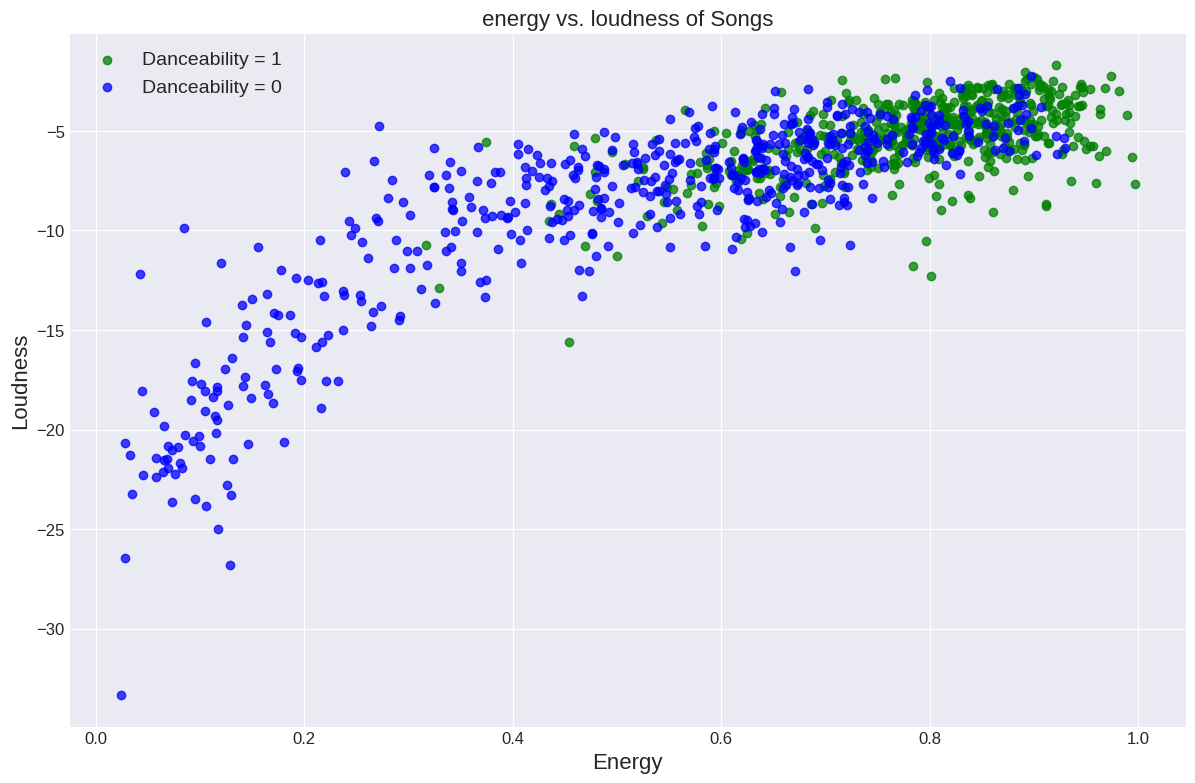

In [49]:
dependance_scatter_plot('energy', 'loudness')

The scatterplot above reflects the positive correlation of energy and loudness with the danceability feature which was observed before (see figure "Features Correlating with Danceability"). The plot shows, that most songs that were classified as danceable have high energy and high loudness while songs that were not classified as danceable appear in all ranges of the loudness and energy feature. The scatterplot also reflects the very high correlation of energy and loudness of a track which was first seen in the figure "Correlation Matrix : spotify dataset".

In [50]:
groupby_std(spotify_df, ['loudness', 'energy'])
# show using "raw output"

Standard deviation of the features loudness and energy.



,loudness,energy
danceability,,
0,4.974427,0.236122
1,1.824767,0.117732


Similar to the previous observation from the dependence of loudness vs. acousticness of tracks we can see again from the above table: The standard deviation (square root of the variance) of the loudness is more than 15 times bigger than the standard deviation of the energy of danceable tracks. 

### Mode vs. Danceability

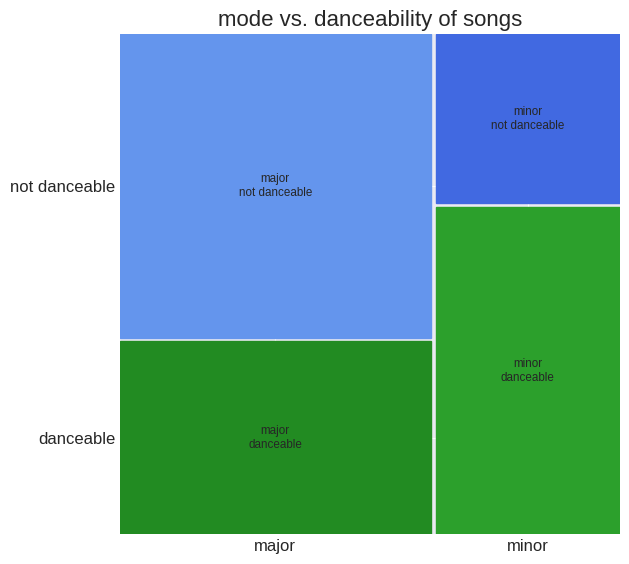

In [51]:
mode_series = spotify_df['mode'].replace([0, 1] , ['minor', 'major'])
danceability_series = spotify_df['danceability'].replace([0,1], ['not danceable', 'danceable'])

fig = plt.figure(dpi = 100, figsize = (5, 5))

props = {}
props[('minor', 'not danceable')] = {'color': 'royalblue'}
props[('minor', 'danceable')] = {'color': 'tab:green'}
props[('major', 'not danceable')] = {'color': 'cornflowerblue'}
props[('major', 'danceable')] = {'color': 'forestgreen'}

mosaic(pd.concat([mode_series, danceability_series], axis = 1), 
    ['mode', 'danceability'], 
    title = 'mode vs. danceability of songs', 
    gap = 0.01, ax = fig.add_axes([1,1,1,1]), properties = props)

plt.show()

The given mosaic plot shows the dependence of the features mode and danceability of tracks.

From the above plot, we develop the hypothesis that the features mode and danceability are stochastically dependent since the rectangles do not have similar sizes.
We want to test our hypothesis using the Chi-Square test of independence. The execution of this test will happen in the upcoming Section "Hypothesis Testing".

# Probability Distributions

We will now analyze the features energy, loudness (high correlation with danceability), and valence (medium correlation with danceability) in more detail by finding theoretical probability distributions which fit the given distributions of the features best. 

In [52]:
def dist_hist_plot(feature, dist):
    x = np.linspace(spotify_df[feature].min(), spotify_df[feature].max(), num=1000)

    fig, ax = plt.subplots(1, 1)
    ax.hist(spotify_df[feature], density=True, alpha = 0.65, bins=100, label = feature) 
    for d in dist:
        fit = getattr(scipy.stats, d).fit(spotify_df[feature])
        pdf = getattr(scipy.stats, d).pdf(x, *fit)
        ax.plot(x, pdf, label = d)
    ax.set_xlabel(feature.title())
    ax.set_ylabel("Frequency")
    ax.legend(loc='upper left')
    ax.set_title('Distribution of the '+feature+' of tracks')
    plt.show()

In [62]:
def q_q_plot(feature, dist):
    for i, d in enumerate(dist):
        if len(dist) != 1:
            plt.subplot(1,2,i+1)
        fit = getattr(scipy.stats, d).fit(spotify_df[feature])
        scipy.stats.probplot(
            spotify_df[feature], sparams=(fit), 
            dist=d, fit=True, 
            plot=plt, rvalue=False)
        plt.title("Q-Q plot\n"+ feature + "-"+ d )
    plt.show()

## Loudness

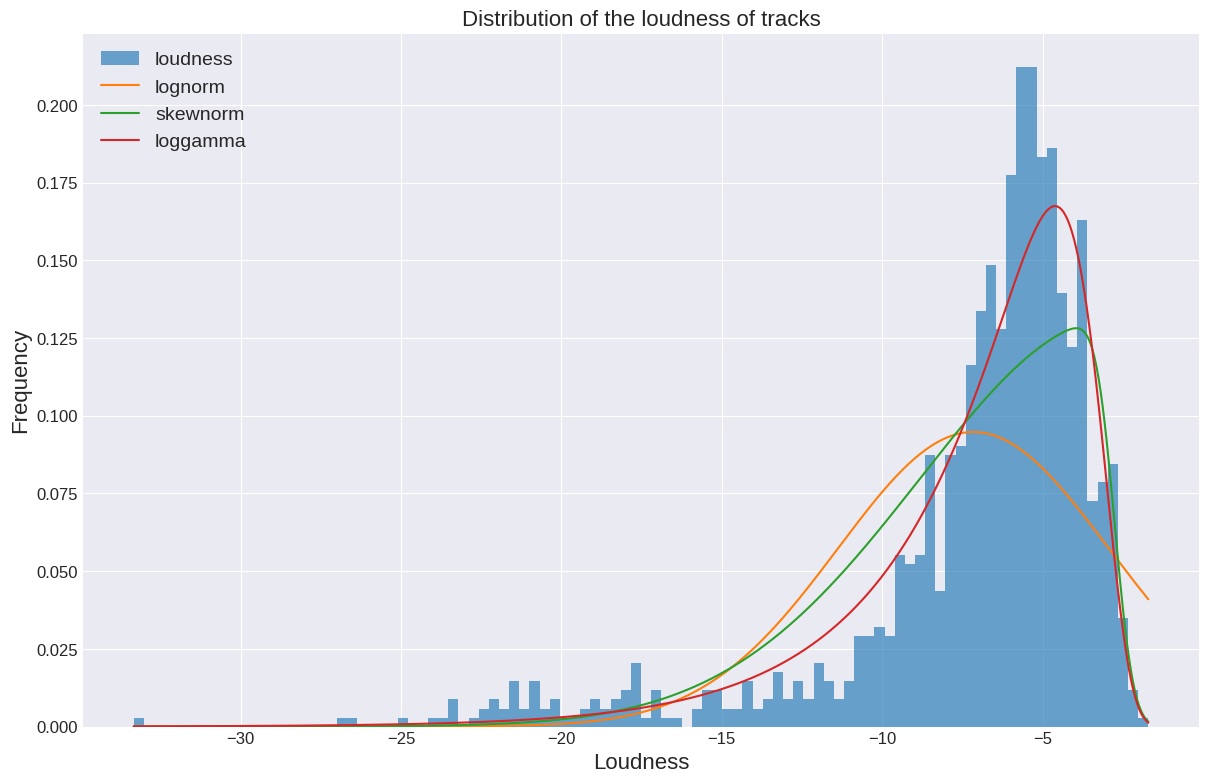

In [63]:
dist = ['lognorm', 'skewnorm', 'loggamma']
dist_hist_plot('loudness', dist)

Given the histogram, we assume the factor loudness to follow a log-gamma or skew-normal distribution. To check this hypothesis we will plot a Q-Q plot for each theoretical distribution and analyse the result.

In [ ]:
q_q_plot('loudness', ['loggamma', 'skewnorm'])

The Q-Q plots of the quantiles of the loudness feature and quantiles from the log-gamma / skew-normal distribution show that the loudness feature is more likely to follow a log-gamma distribution since the given scatter plot follows the 45° line closer than the Q-Q plot of the loudness feature with the skew-normal distribution. 

**Parameter Estimation**

The probability density function for the log-gamma distribution (standarized form): <div align="center">
$\displaystyle{f(x,c) = \frac{\exp(\beta x -\exp(x))}{\Gamma (\beta)}},$
</div> 

for all $x,~\beta > 0$ and $\Gamma$ describes the gamma function. The log-gamma distribution belongs to the location-scale family and has three parameters: $\beta$ (shape parameter), $\alpha$ (scale parameter), and $\mu$ (location parameter). We can estimate those parameters using maximum likelihood estimation MLE.

In [66]:
beta, loc, scale = scipy.stats.loggamma.fit(spotify_df['loudness'])
print(f'Estimated parameters given data: beta = {beta:.3f}, loc = {loc:.3f}, and scale = {scale:.3f}.')

Estimated parameters given data: beta = 0.257, loc = -3.353, and scale = 0.925.


## Energy

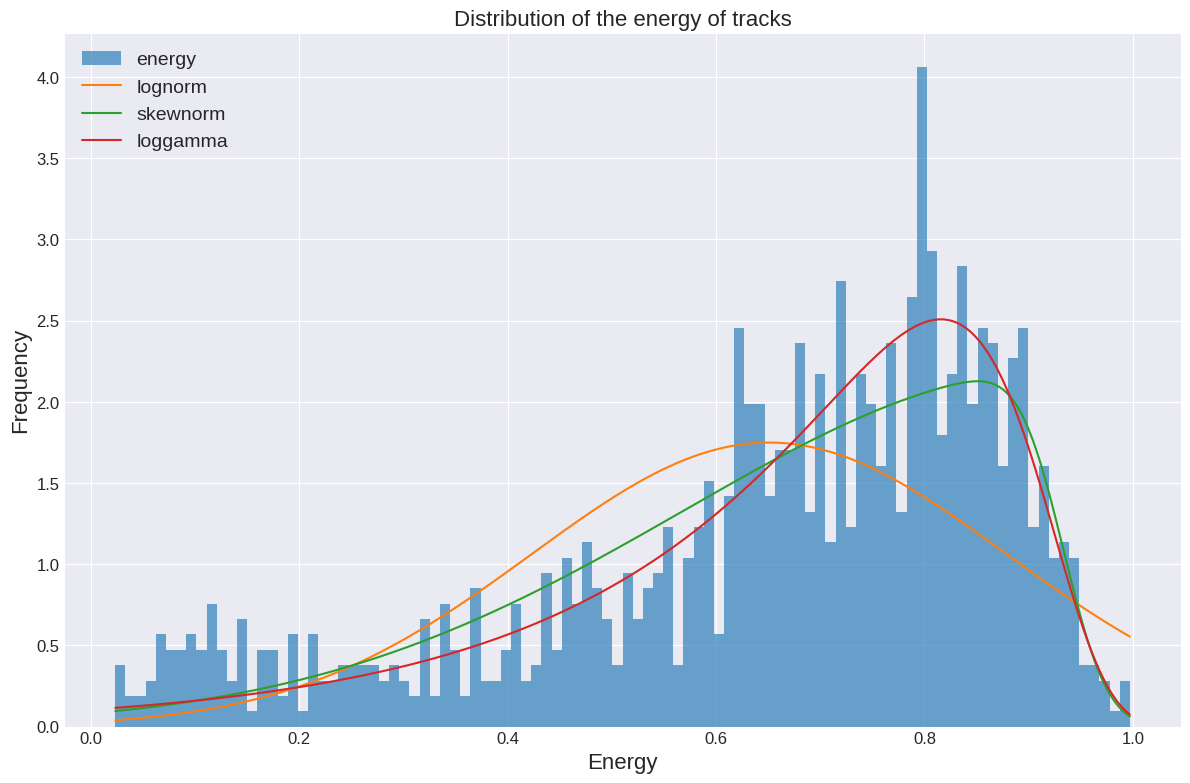

In [67]:
dist = ['lognorm', 'skewnorm', 'loggamma']
dist_hist_plot('energy', dist)

Similar to the histogram of the loudness feature, the histogram of the energy of tracks is negatively skewed. Given the histogram, we assume the factor energy to follow a log-gamma or skew-normal distribution. 

In [ ]:
q_q_plot('energy', ['loggamma', 'skewnorm'])

According to the given Q-Q plots we expect the energy feature to follow a skew-normal distribution.

**Parameter Estimation**

The probability density function for the skew-normal distribution (standarized form): <div align="center">
$\displaystyle{f(x,\alpha) = 2\frac{1}{\sqrt{2\pi}}\exp(-\frac{x^2}{2})\frac{1}{2}[1+\text{erf}(\frac{\alpha x}{\sqrt{2}})]},$
</div> 

for all $x,~\alpha \in \mathbb{R}$ and $\text{erf}$ describes the error function. The skew-normal distribution belongs to the location-scale family and has three parameters: $\alpha$ (shape parameter), $\omega$ (scale parameter), and $\xi$ (location parameter). We can estimate those parameters using maximum likelihood estimation MLE.

In [69]:
alpha, loc, scale = scipy.stats.skewnorm.fit(spotify_df['energy'])
print(f'Estimated parameters given data: alpha = {alpha:.3f}, loc = {loc:.3f}, and scale = {scale:.3f}.')

Estimated parameters given data: alpha = -10.762, loc = 0.933, and scale = 0.363.


## Valence

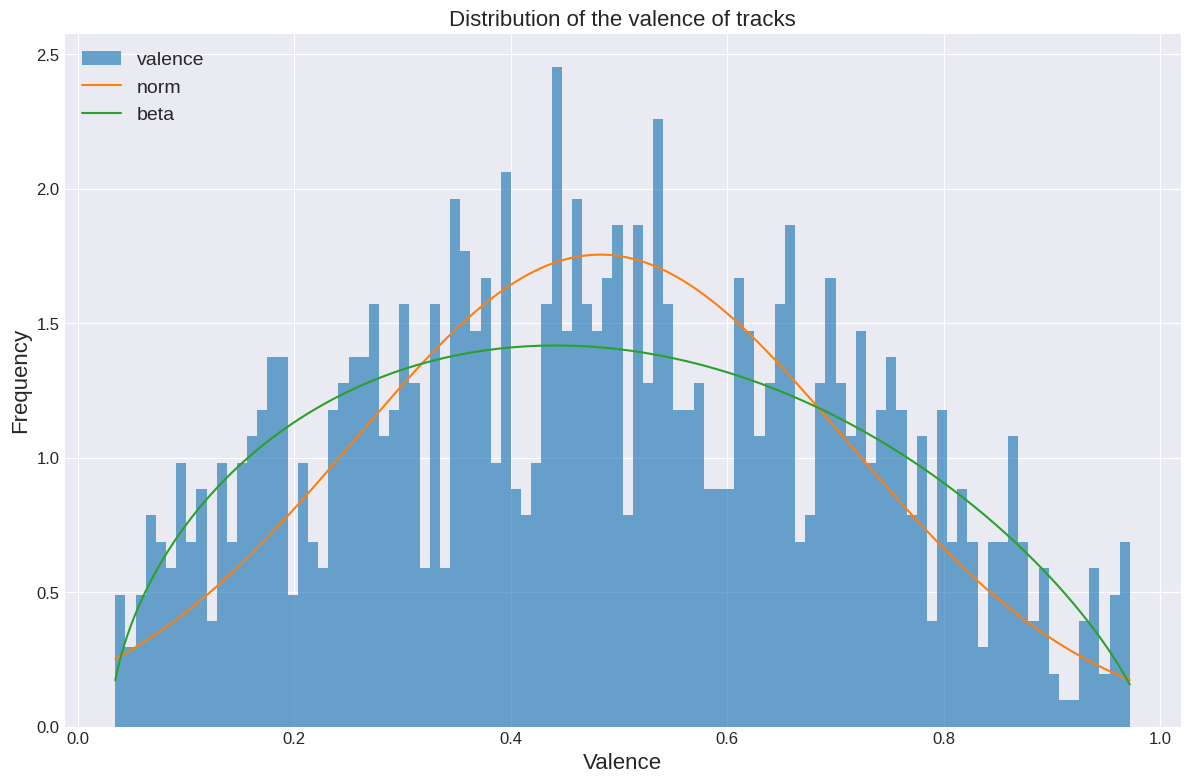

In [70]:
dist = ['norm', 'beta']
dist_hist_plot('valence', dist)

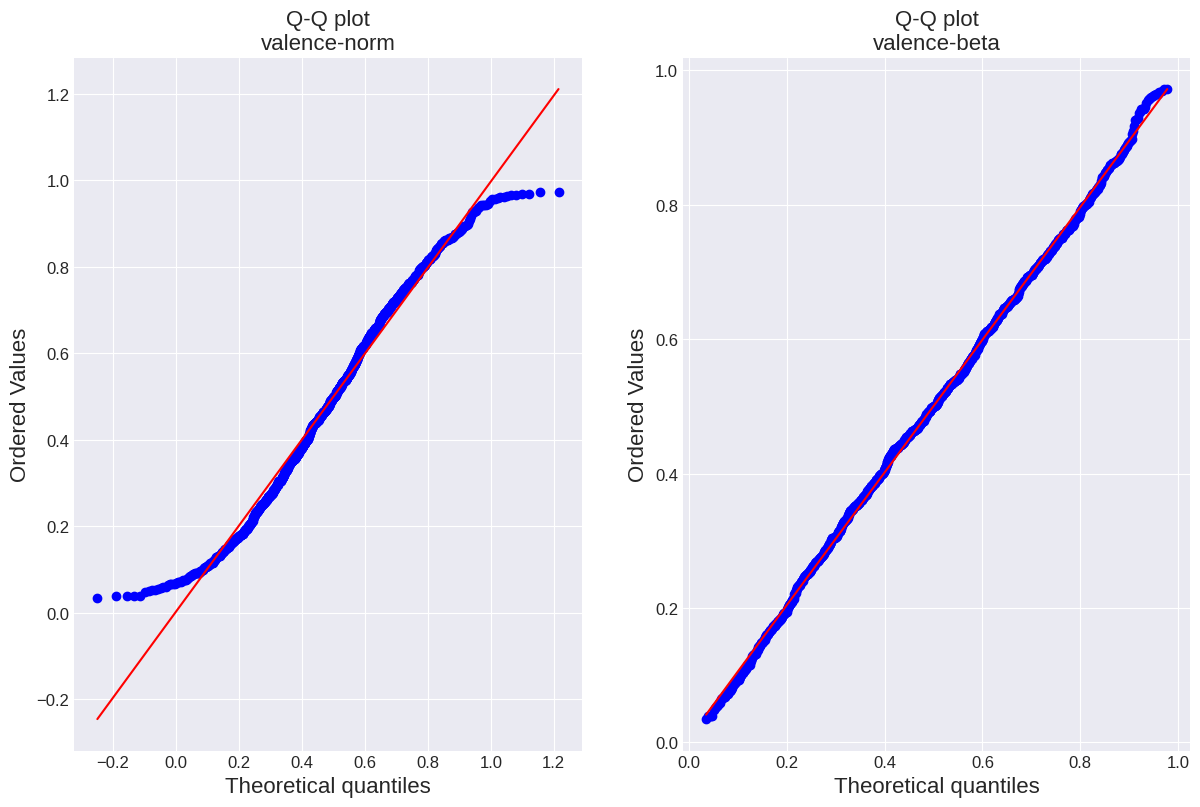

In [71]:
q_q_plot('valence', ['norm', 'beta'])  

In this case, the Q-Q plot of the valence feature of tracks and the theoretical beta distribution follows almost exactly the 45° line; we expect the feature valence to follow a beta distribution. 

**Parameter Estimation**

The probability density function for the beta distribution (standarized form): <div align="center">
$\displaystyle{f(x,\alpha, \beta) = \frac{\Gamma (\alpha + \beta)x^{\alpha -1}(1-x)^{\beta -1}}{\Gamma(\alpha)\Gamma(\beta)}},$
</div> 

for all $x\in [0,1],~\alpha > 0,~\beta >0$ and $\Gamma$ describes the Gamma function. The beta distribution belongs to the location-scale family and has four parameters: $\alpha, ~ \beta$ (shape parameters), scale parameter, and location parameter. We can estimate those parameters using maximum likelihood estimation MLE.

In [72]:
alpha, beta, loc, scale = scipy.stats.beta.fit(spotify_df['valence'])
print(f'Estimated parameters given data: alpha = {alpha:.3f}, beta = {beta:.3f}, loc = {loc:.3f}, and scale = {scale:.3f}.')

Estimated parameters given data: alpha = 1.565, beta = 1.749, loc = 0.030, and scale = 0.957.


# Hypothesis Testing

## Mode and Danceability are independent
### Chi-Square Test of Independence

When we previously took a look at the dependence of a track's mode and danceability, we formulated the following hypothesis:
> *"The features mode and danceability are stochastically dependent."*

We can apply the Chi-Square Test since our variables mode and danceability are categorical. In general, the purpose of the Chi-Square Test is to test if two variables are independent. In our specific case we have the following null hypothesis:

$H_0$: *"mode and danceability are independent."*\
$H_A$: *"mode and danceability are stochastically dependent."*

Given the data $(x_1, y_1), \ldots ,(x_n, y_n)$ corresponding to danceability ($x_i$) and mode ($y_i$) we assume $(x_i, y_i)$ to be i.i.d. From our Spotify dataset, we have the following contingency table:

In [73]:
cross_tab = pd.crosstab(spotify_df['danceability'], mode_series, margins = True)
cross_tab

mode,major,minor,All
danceability,,,
0,417,138,555
1,265,267,532
All,682,405,1087


For the variables mode and danceability (d) to be independent, the following must hold:

- $\mathbb{P}(d = 0, major) = \mathbb{P}(d = 0)\mathbb{P}(major)$
- $\mathbb{P}(d = 0, minor) = \mathbb{P}(d = 0)\mathbb{P}(minor)$
- $\mathbb{P}(d = 1, major) = \mathbb{P}(d = 1)\mathbb{P}(major)$
- $\mathbb{P}(d = 1, minor) = \mathbb{P}(d = 1)\mathbb{P}(minor)$

The left-hand side of the above equations are our parameters of interest which can be estimated using the above contingency table: 

Estimate (LHS) = $\displaystyle{\frac{\text{All}(d)\text{All}(mode)}{n}}$, with $n = 1084$.

Our test statistic converges to a chi-square distribution under the assumption, the null hypothesis is correct. Expression of our test statistic: <div align="center">
$ \displaystyle{s = \sum \frac{(O_i - E_i)^2}{E_i}}$,</div> 
where: $c$ = degrees of freedom, $O$ = observed values, $E$ = expected values. 

Expression for the null distribution: <div align="center">
$ \displaystyle{\chi_c^2 = \frac{1}{2^{c/2} \Gamma(k/2)}x^{c/2-1}\exp(-x/2)}$. </div> 

Since mode and danceability have 2 classes each we have $c = 1$.

We choose the significance level $\alpha = 0.05$, i.e. an error level of 5%.

In [74]:
# compute test statistic from data
E = []
O = []
n = cross_tab.loc['All'].loc['All']
for danceability in range(2):
    for mode in ['major', 'minor']:
        E.append(cross_tab.loc['All'].loc[mode]*cross_tab.loc[danceability].loc['All']/n)
        O.append(cross_tab.loc[danceability].loc[mode])

s = sum([(E[i] - O[i])**2/E[i] for i in range(4)])
print(f'Test statistic s = {s:.3f}')

Test statistic s = 74.512


In [75]:
# compute the p-value
# p = P(X >= s | H0)
p = 1 - stats.chi2.cdf(s, df = 1)
print(f'p-value p = {p:.4f}')

p-value p = 0.0000


The $p$-value is $< 0.00001$. Since $0.0 \approx p \ll \alpha = 0.05 $ we clearly reject the null hypothesis $H_0$ : *"mode and danceability are independent"*. 

## More people dance to non-acoustic music
### Two-sample t-test

When we previously took a look at the histogram of the acousticness value and later on when analyzing the dependence of a track's acousticness with its energy, loudness; and danceability, we developed the following hypothesis:
> *"More people dance to non-acoustic music on average."*

We can apply the two-sample t-test since we have two samples of independent test subjects (acousticness given danceability = 0 [*sample X*] and acousticness given danceability = 1 [*sample Y*]), where the two samples are independent from one another.

In [76]:
# samples 
X = spotify_df[spotify_df.danceability == 0].acousticness
X = X.rename('sample X')
X = X.reset_index(drop = True)

Y = spotify_df[spotify_df.danceability == 1].acousticness
Y = Y.rename('sample Y')
Y = Y.reset_index(drop = True)

pd.concat([X,Y], axis = 1)

,sample X,sample Y
0,0.0244,0.000417
1,0.2590,0.024900
2,0.0690,0.013400
3,0.1810,0.199000
4,0.8020,0.099200
...,...,...
550,0.1680,NaN
551,0.5080,NaN
552,0.2150,NaN
553,0.2290,NaN


Our data: 
- sample $X$ : $ x_1, \ldots , x_{N_X}$; $ X_1, \ldots , X_{N_X}$ i.i.d. 
- sample $Y$ : $y_1, \ldots , y_{N_Y}$; $ Y_1, \ldots , Y_{N_Y}$ i.i.d. 

In [77]:
# N_x and N_Y
N_X = X.count()
N_Y = Y.count()

print_md(f'$N_X$ = {N_X} and $N_Y$ = {N_Y}.')

$N_X$ = 555 and $N_Y$ = 532.

We are interested in the mean of sample X and Y: $\mu_X, \mu_Y$. We can estimate these parameters using the sample mean $\bar{x}$ and $\bar{y}$.

For both samples; the sample size is quite large. By applying the central limit theorem we can assume that the sample mean $\bar{x}$ and $\bar{y}$ approximately follow a Gaussian distribution.

With those preparations, we develop the following null hypothesis:

$H_0$ : $~\mu_X - \mu_Y = 0$ \
$H_A$ : $~\mu_X - \mu_Y \neq 0$

Our test statistic can be described as follows:<div align="center">
$ \displaystyle{t_0 = \frac{\bar{x}-\bar{y}}{\sqrt{\frac{s_X^2}{N_X}+ \frac{s_Y^2}{N_Y}}}}$,</div>
where $s_X$ and $s_Y$ describe the sample standard deviation.


In [78]:
# sample mean
mu_X = X.mean()
mu_Y = Y.mean()

# sample standard deviation
s_X = X.std()
s_Y = Y.std()

temp_X = s_X**2/N_X
temp_Y = s_Y**2/N_Y

# compute the test statistic from data
t = (mu_X - mu_Y)/(temp_X + temp_Y)**0.5

The null distribution follows a Student's-t ditribution with degrees of freedom df:<div align="center">
$ \displaystyle{df = \frac{(s_X^2/N_X + s_Y^2/N_Y)^2}{(\frac{s_X^2}{N_X})^2/(N_X-1) + (\frac{s_Y^2}{N_Y})^2/(N_Y-1)}}$.</div>

In [79]:
# degrees of freedom
df_counter = (temp_X + temp_Y)**2
df_denominator = (temp_X**2/(N_X-1)+temp_Y**2/(N_Y-1))
df = df_counter/df_denominator

We choose the significance level $\alpha=0.05$, i.e. an error level of 5%.

In [80]:
print(f'Test statistic t = {t:.3f}')

# compute the p-value
p = 2*min(stats.t.cdf(t, df = 1082), 1-stats.t.cdf(t, df = 1082))
print(f'Two-tailed p-value p = {p:.4f}')

Test statistic t = 19.609
Two-tailed p-value p = 0.0000


The $p$-value is $< 0.00001$. Since $0.0 \approx p \ll \alpha = 0.05 $ we clearly reject the null hypothesis $H_0$. This test shows, that there is sufficient evidence to support the alternative hypothesis: *"More people dance to non-acoustic music on average"*. 

# Predictive Analysis

In this section, we will apply two predictive machine learning models to solve our objective of finding the best songs for a party. We will apply the following models / algorithms:

- K-Nearest Neighbors (KNN)
- Decision tree

For each of the algorithms, we will train a number of different models in order to maximize the accuracy / f1-score. In the end, we will compare the best model of each algorithm with each other and decide on one algorithm for our problem.

**Mathematical Modeling for binary classification** <p align="center">$ y = g(x; ~\Theta ~|~ h) $</p>
$y \in \{0$ : 'not danceable', $1$ : 'danceable'$\}$ : Categorical - Nominal data; \
$x$ : numerical (with encoded categorical values)\
$g$ : classification model - KNN or Decision Tree \
$\Theta$ : parameters \
$h$ : hyperparameters

## Train-Validation split

In [81]:
def train_val_split(df):
    df_train, df_validation = train_test_split(df, test_size = 0.2, random_state = 0, shuffle = True)
    df_train_y = df_train['danceability']
    df_validation_y = df_validation['danceability']
    df_train_X = df_train.drop('danceability', axis = 1)
    df_validation_X = df_validation.drop('danceability', axis = 1)

    return df_train_X, df_train_y, df_validation_X, df_validation_y

In [82]:
df_train_X, df_train_y, df_validation_X, df_validation_y = train_val_split(spotify_df) 

print(f'Number of train data: {len(df_train_X)}')
print(f'Number of validation data: {len(df_validation_X)}')

Number of train data: 869
Number of validation data: 218


### Distribution

We now want to check if the training set and the validation set follow the same distribution by using Q-Q plots to show their relations. 
Since our input vector is quite large (12 different features) we will only check on the features loudness, energy, and acousticness. Those features have the highest correlation with the danceability of tracks and, therefore, might have a big impact on the classification of a track.

In [83]:
def q_q_plot_compare(feature):

    # get quantiles
    p = np.linspace(1, 99, num=100)*0.01
    data_quantiles_val = np.quantile(df_validation_X[feature], p)
    data_quantiles_train = np.quantile(df_train_X[feature], p)

    plt.scatter(data_quantiles_val, data_quantiles_train)  
    plt.plot(plt.xlim(), plt.xlim(), color='red', lw=2, scalex=False, scaley=False)
    plt.xlabel('Validation quantiles')
    plt.ylabel('Test quantiles')
    plt.title('Q-Q plot\n'+feature)
    plt.show()


#### Loudness

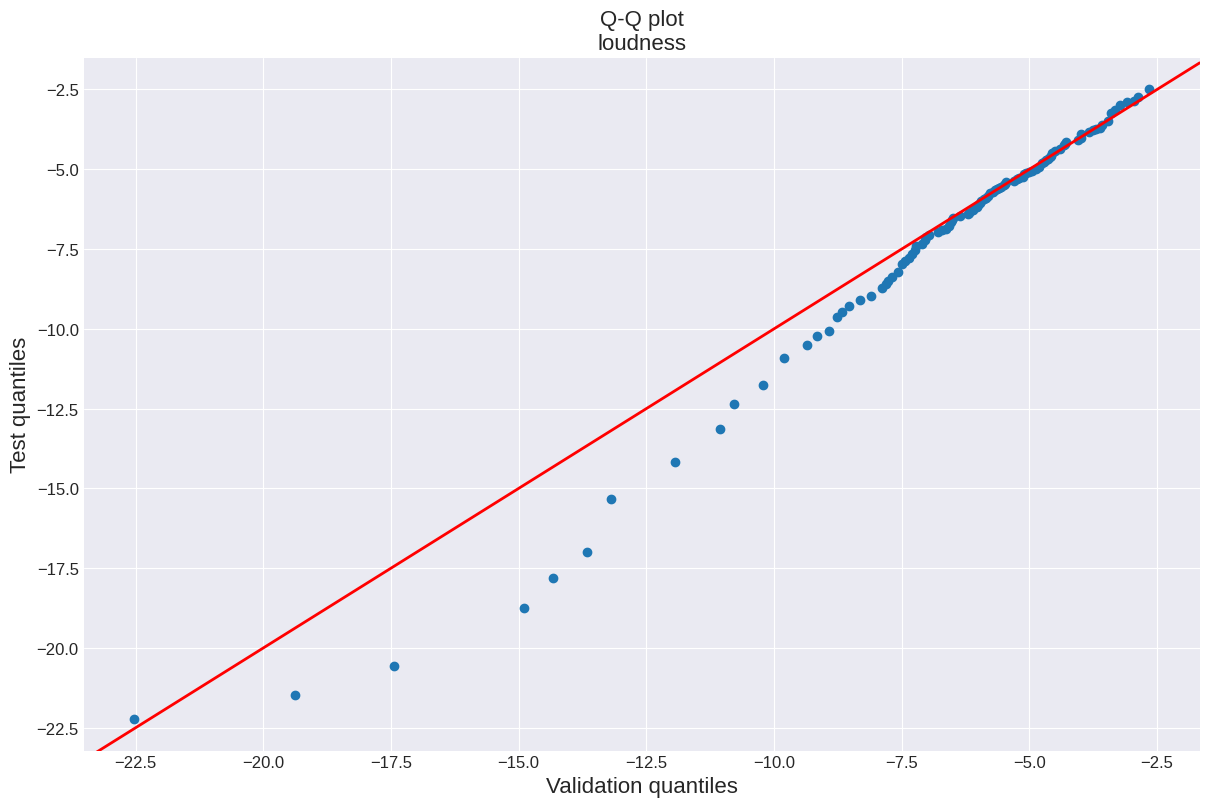

In [84]:
q_q_plot_compare('loudness')

#### Energy

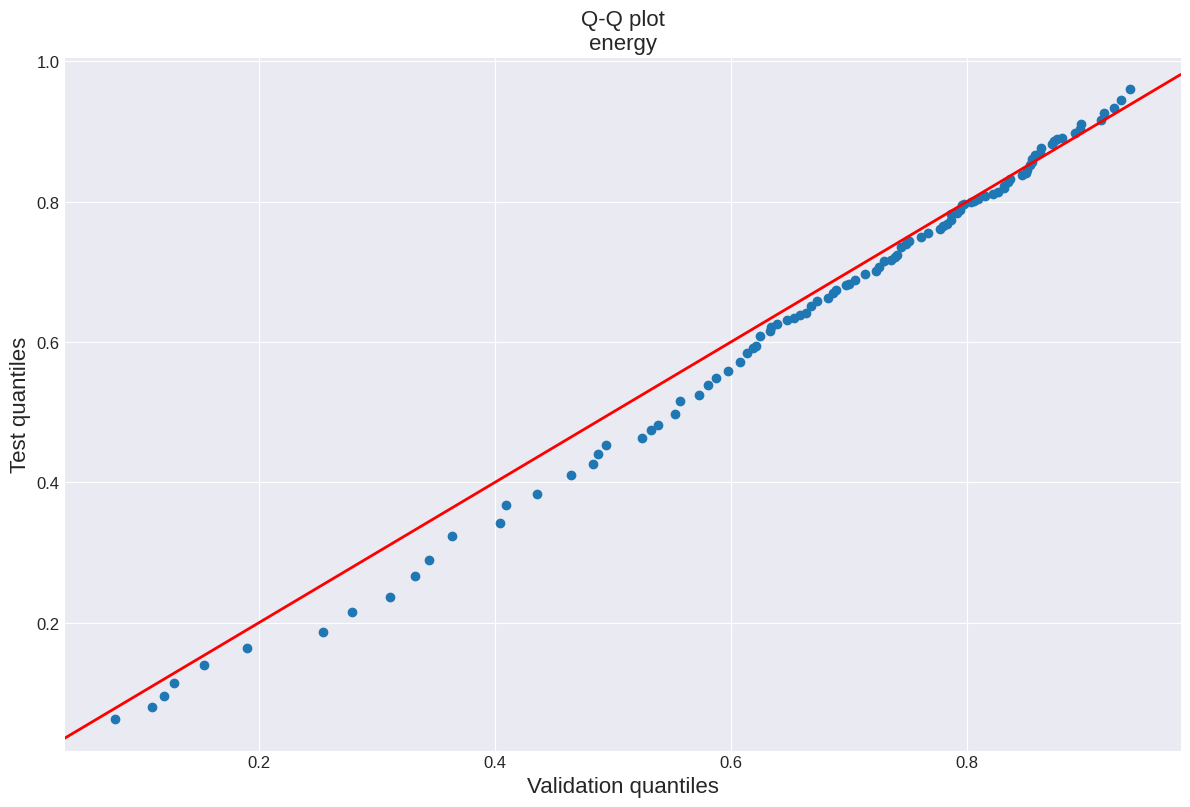

In [85]:
q_q_plot_compare('energy')

#### Acousticness

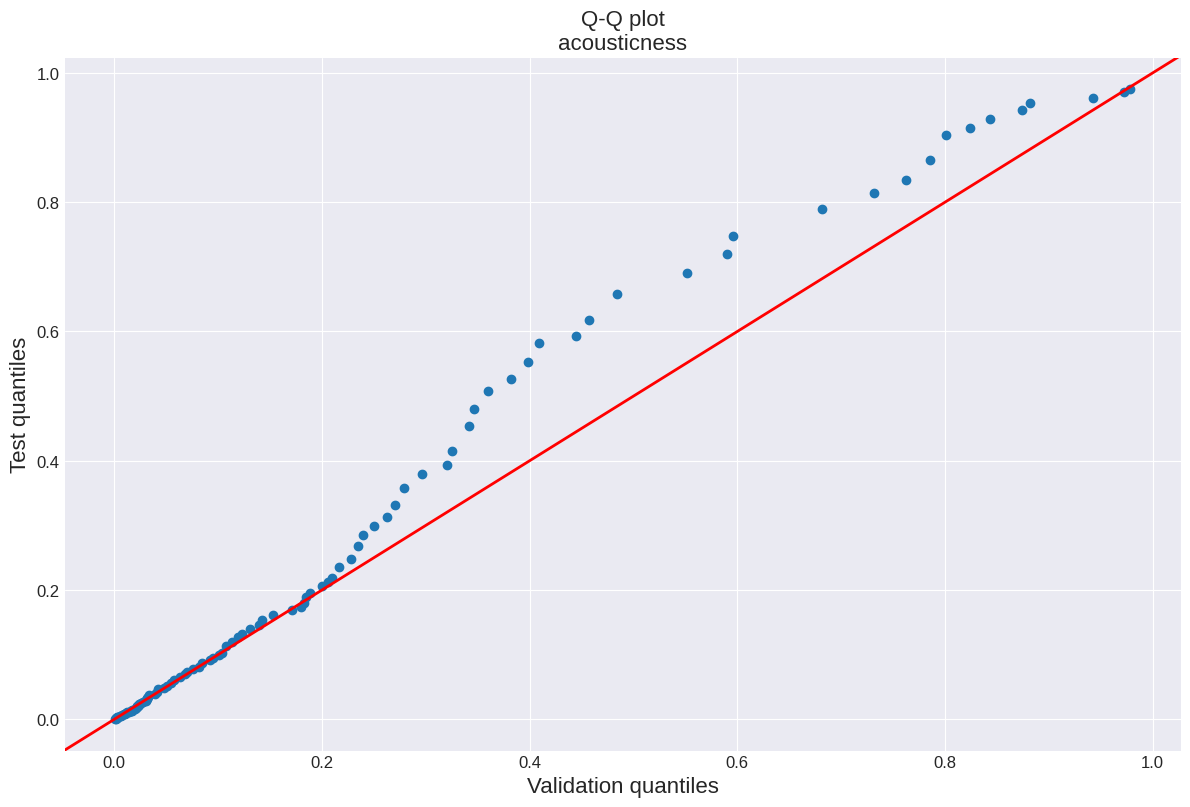

In [86]:
q_q_plot_compare('acousticness')

#### Danceability

In [87]:
print(f"""Sample mean of danceability:
    train set : {df_train_y.describe()['mean']:.4f} 
    validation set: {df_validation_y.describe()['mean']:.4f}""")

Sample mean of danceability:
    train set : 0.4822 
    validation set: 0.5183


Taking the above plots into consideration, we conclude that the sample distributions of the features energy and acousticness given the validation and training set follow a similar distribution. The quantiles of the energy and acousticness feature for the train and validation set follow the 45° line quite well. On the other hand, the loudness feature quantiles do not follow the 45° line that well. Especially for lower quantiles, the validation set seems to differ quite a bit from the test set given the feature loudness.

However, looking at the danceability feature, about half of our data is danceable in both sets - the sample mean is close to 0.5 for each. Even though the Q-Q plot of the loudness factor does not follow the 45° line as precise, we still conclude that our validation dataset and our test dataset follow the same distribution, since the other features considered seem to follow similar distributions.

## Models

In [88]:
def create_knn_classifier(df_train_X, df_train_y, neighbors, weights):
    knn_classifier = KNeighborsClassifier(n_neighbors=neighbors, weights=weights)
    knn_classifier.fit(df_train_X, df_train_y)    
    return knn_classifier

def create_dt_classifier(df_train_X, df_train_y, max_depth, **kwargs):
    clf = DecisionTreeClassifier(max_depth=max_depth, **kwargs) #random_state=0, 
    clf.fit(df_train_X, df_train_y)
    return clf

In [89]:
def get_clf_metrics(model, df_validation_X, df_validation_y, plot_conf_mx=False):
    """ Calculate the accuracy and f score of a model, optionally plot its 
    confusion matrix """

    predictions = model.predict(df_validation_X)
    cm = metrics.confusion_matrix(df_validation_y, predictions)
    f1 = metrics.f1_score(predictions, df_validation_y)
    acc = metrics.accuracy_score(predictions, df_validation_y)
    
    if plot_conf_mx:
        plot_confusion_mx(cm, acc, f1)
        
    return acc, f1

def plot_confusion_mx(cm, acc, f1):
    plt.figure()
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label')
    plt.title('Accuracy Score: {0}\n F1 Score: {1}'.format(round(acc, 4), round(f1, 4)))
    plt.show()

In [90]:
def create_models(model, df_train_X, df_train_y, df_validation_X, df_validation_y, r_min, r_max, *w, **j):
    """ Create models with different parameters and calculate their metrics """

    models = []
    accuracies = []
    f_scores = []
    
    # only keeping relevant columns - removing track_id, artist_name, track_name
    if 'track_id' in df_train_X.columns:
        df_train_X = df_train_X.iloc[:, 3:]
        df_validation_X = df_validation_X.iloc[:, 3:]

    for i in range(r_min, r_max):
        if model=='decision_tree':
            clf = create_dt_classifier(df_train_X, df_train_y, i, **j)
        elif model=='knn':
            clf = create_knn_classifier(df_train_X, df_train_y, 2*i-1, *w)
            
        models.append(clf)
        acc, f1 = get_clf_metrics(clf, df_validation_X, df_validation_y)
        accuracies.append(acc)
        f_scores.append(f1)
        
    return  pd.DataFrame(list(zip(models, accuracies, f_scores)), columns =['model', 'accuracy', 'f_score'])

def select_best_model(models_df):
    """ Select the best model based on accuracy and f score from a given set """

    models_df = models_df.sort_values(by=['accuracy', 'f_score'], ascending=False).reset_index(drop=True)
    return models_df.iloc[0]

In [91]:
def plot_scores(models_df, x_label, title):
    """ Plot the accuracy and f score of a set of models and return the best model """

    plt.figure(figsize=(2*1.6*9,9))
    plt.suptitle(title, fontsize = 20)

    f1 = models_df['f_score']
    acc = models_df['accuracy']
    
    if x_label=='K':
        x_values = list(models_df['model'].apply(lambda x: x.get_params()['n_neighbors']))
    elif x_label=='depth of tree':
        x_values = list(models_df['model'].apply(lambda x: x.get_params()['max_depth']))   
    models_df['x_value'] = x_values   
        
    # f1-score
    plt.subplot(1,2,1)
    plt.plot(x_values, f1, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    plt.title('F1-score vs. ' + x_label)
    plt.xlabel(x_label)
    plt.ylabel('F1-score')

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(x_values, acc, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
    plt.title('Accuracy vs. ' + x_label)
    plt.xlabel(x_label)
    plt.ylabel('Accuracy')
    
    best_model = select_best_model(models_df)
    
    print('Best model scores at ' + x_label + ' = ' + str(best_model.x_value))
    print('F1-score = {0}'.format(round(best_model.f_score, 4)))
    print('Accuracy = {0}'.format(round(best_model.accuracy, 4)))

    plt.show()
    
    return best_model

## K - Nearest Neighbors

We will use the k-Nearest Neighbors algorithm for classification. In this algorithm, classification is computed from a simple majority vote of the nearest neighbors of each point: a point is assigned danceable if most (nearest) neighbors of the point have the label "danceable" (danceability = 1).

**Description**

*Name* \
$\quad$ k-Nearest Neighbors

*mathematical expression* \
$\quad$ Given a training set $x_0, \ldots, x_N$ with labels $y_0, \ldots , y_N$ the label $y$ of a new data point (represented by the $d$-dimensionl feature vector $x = [x^0,\ldots , x^{d-1}]$) can be calculated the following way:

Given the set $D_x = \{\tilde{x}_0, \ldots , \tilde{x}_{K-1}\}$ of the $K$-nearest neighbors of $x$ [see *parameter estimation* on how to compute those] and the corresponding set of labels $\tilde{y}_0, \ldots , \tilde{y}_{K-1}$ it is  <div align="center">
$\displaystyle{y = \underset{s \in \{0, 1\}}{\arg\max} \sum_{i=0}^{K-1} w_iI_s(y_i)}$,</div>
where $I_s$ for $s \in \{0, 1\}$ describes the so-called indicator function<div align="center">$I_s : \{0,1\} \rightarrow \{0,1\}, ~ I_s(\iota) = \bigg\{\begin{array}{lr}
        0, & \iota \notin \{s\}\\
        1, & \iota \in \{s\}
        \end{array}. $ 
</div> 

Further, $w_i$ describes the weight for each neighbor $x_i$. We will see an explanation of the weighting in the upcoming part.

*Hyperparameters* \
$\quad$ n_neighbors - the number of neighbors\
$\quad$ weights $\in \{$ 'uniform', 'distance' $\}$ or callable - weight function\
$\quad$ metric: str or callable - metric function 

*Parameters* \
$\quad$ table of actual nearest neighbors 

For the *weight function* we have the following options:
- ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally: $w_i = 1$
- ‘distance’ : weight points by the inverse of their distance $\rightarrow$ closer neighbors of a point have a greater influence on the classification of that point: $w_i = 1-\text{dist}(x, \tilde{x}_i)$
- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.
In the following we will always choose both weights, 'uniform' and 'distance', and compare the result for each model.

As *metric* we are choosing the euclidean distance / minkowski metric since this metric seems the most fitting for our kind of data as we want to compute the absolute distance of different data points (given their feature values). 

*Parameter estimation* \
$\quad$ We can estimate the table of nearest neighbors by minimizing the following loss function:<div align="center">$\displaystyle{L(\hat{x}_0, \ldots, \hat{x}_K) = \sum_{i=0}^{K-1} \text{dist}(\hat{x}_i, x)},  $ 
</div> 

where $\hat{x}_i \in \{x_0, \ldots, x_N\} $ and $\hat{x}_i \neq \hat{x}_j$ for all $i, j \in \{0, \ldots , K-1\}, ~i \neq j$. Finally, the set of the $K$-nearest neighbors can be described as<div align="center">$\displaystyle{D_x = \{\tilde{x}_0, \ldots , \tilde{x}_{K-1}\}= \underset{\hat{x}_0, \ldots, \hat{x}_K}{\arg\min} L = \underset{\hat{x}_0, \ldots, \hat{x}_K}{\arg\min}\sum_{i=0}^{K-1} \text{dist}(\hat{x}_i, x)}.  $ 
</div> 


When computing a KNN classifier we will not set the value for $K$ (number of neighbors) manually but instead, choose the best value of $K$ by calculating accuracy and f1-score and choosing the $K$ value for which the model has the best scores. 

### All Features

We will start with KNN classifiers that only differ in the chosen weight function. In the following, we will fit 30 models for each, 'distance' and 'uniform' weights. Since we are dealing with a binary classification problem we will only choose an odd number of neighbors to prevent draws of neighboring labels. 

For each weight label, we decide on the best model / the best $K$ by choosing the $K$ value for which the accuracy / f1-score is the highest. 

In [92]:
uniform_clf = create_models('knn', df_train_X, df_train_y, df_validation_X, df_validation_y, 1, 30, 'uniform')
distance_clf = create_models('knn', df_train_X, df_train_y, df_validation_X, df_validation_y, 1, 30, 'distance')

#### f1-score and Accuracy

Best model scores at K = 3
F1-score = 0.6063
Accuracy = 0.6009


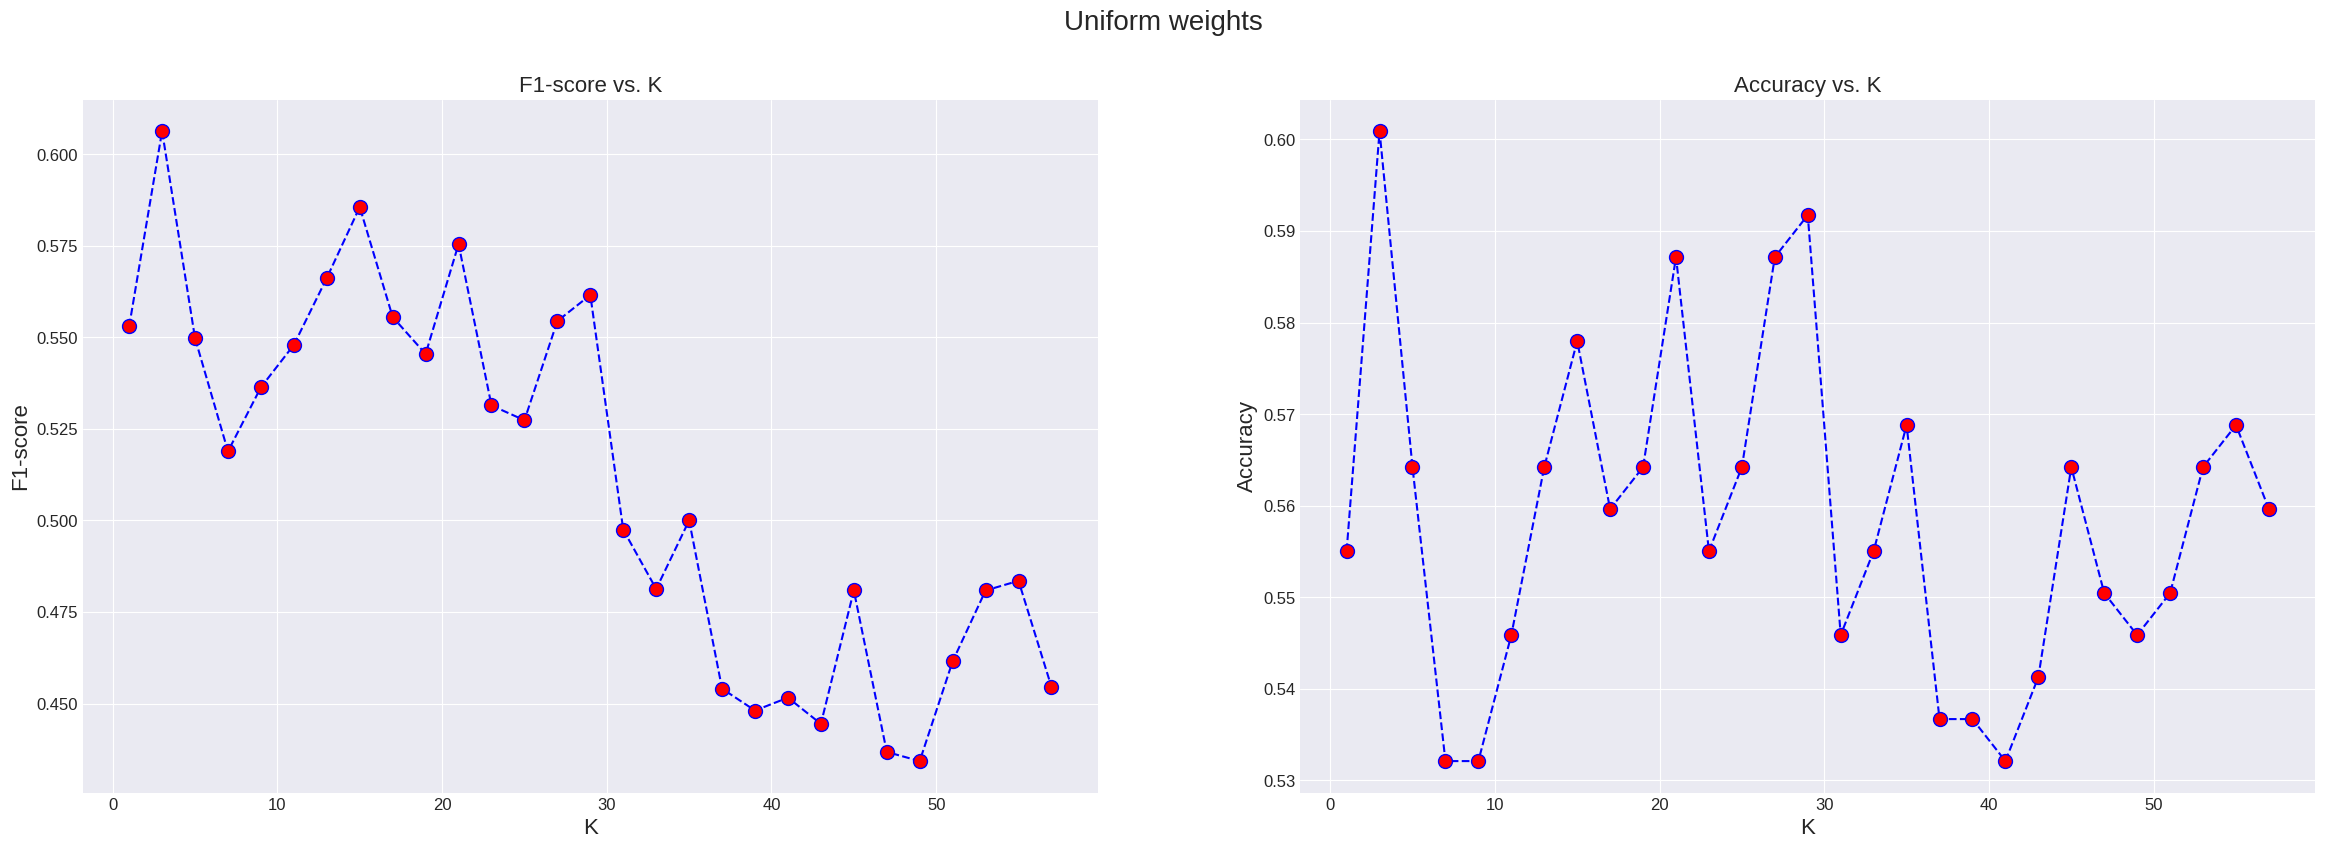

In [93]:
best_uniform_knn_model = plot_scores(uniform_clf, 'K', 'Uniform weights')

Best model scores at K = 33
F1-score = 0.5882
Accuracy = 0.5826


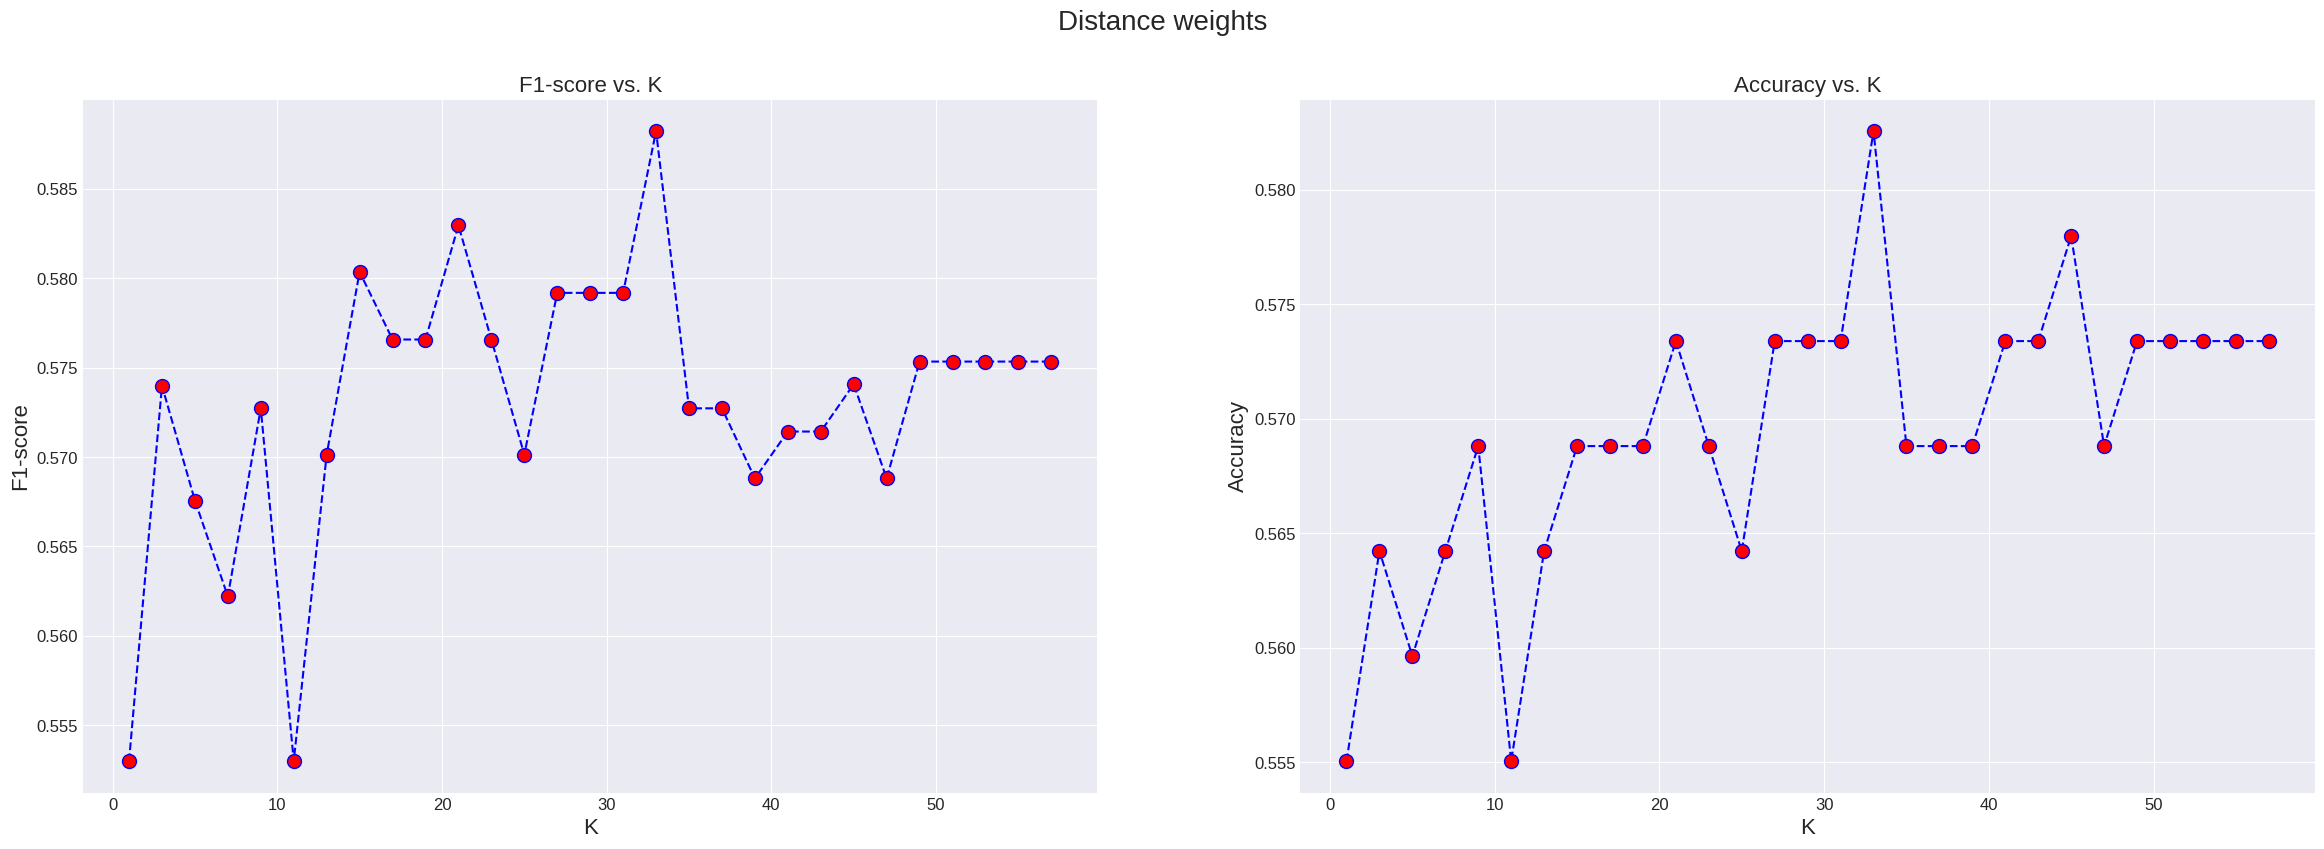

In [94]:
best_distance_knn_model = plot_scores(distance_clf, 'K', 'Distance weights')

When training KNN models on all features we only get maximum accuracy and f1-score of below 60% for both, distance and uniform weights. These low scores might be due to the fact that only the $K$ nearest neighbors decide on the classification of a sample point and not all points. It is not guaranteed that the $K$ neighbors are the best points to decide on the danceability of the current sample point. \
When considering all 12 features we put our sample points into a 12-dimensional space. Some of those dimensions, e.g. features that have a low correlation with danceability, might not have a big impact on the model and might only make the model more complicated, or worse, be contra-productive and lead to a wrong classification. 

To test this **hypothesis**: 
    
>*Not all features are needed for classification / fewer features lead to a more accurate model*,  

we will train several KNN models on fewer features [in total 10 different test-cases for each weight function]. We decide on the features by sorting those by their absolute correlation with danceability. We then train models with different numbers of features with decreasing correlation. By this method, we hope to find a few specific features for which the KNN classifier works best. 

Again, for each number of features, we will train models for 30 different $K$ values and pick the one model with the highest accuracy / f1-score. Out of those 10 best models we pick that number of features that maximizes the accuracy / f1-score for each weight function. 

We will call the resulting best model *"distance model"* or *"uniform model"*, depending on the applied weight function. 

### Selected Features

In [95]:
def reduce_features(df_train, df_val, features):
    df_train = df_train[features]
    df_val = df_val[features]
    return df_train, df_val

In [96]:
def best_models_knn_selected(feature_list, df_train_X, df_train_y, df_validation_X, df_validation_y):
    """ Returns DataFrame containing best KNN-models (based on accuracy + f1-score) 
    for 2 to len(feature_list)-1 many features from feature_list.
    """
    # preparation
    uniform_clf_sel_all = []
    distance_clf_sel_all = []
    uniform_clf_sel_best = []
    distance_clf_sel_best = []
    best_uniform_knn_model = []
    best_distance_knn_model = []

    for n in range(1, len(feature_list)-1):
        # take the first n+1 in features in feature_list
        features = feature_list[0:n+1]
        # reduce sets
        df_train_X_sel, df_validation_X_sel  = reduce_features(df_train_X , df_validation_X, features)

        # create models
        uniform_clf_sel_all.append(create_models('knn', df_train_X_sel, df_train_y, df_validation_X_sel, df_validation_y, 1, 30, 'uniform'))
        distance_clf_sel_all.append(create_models('knn', df_train_X_sel, df_train_y, df_validation_X_sel, df_validation_y, 1, 30, 'distance'))

        # select best models
        uniform_clf_sel_best.append(select_best_model(uniform_clf_sel_all[n-1]).append(pd.Series([n+1], index = ['n_features'])))
        distance_clf_sel_best.append(select_best_model(distance_clf_sel_all[n-1]).append(pd.Series([n+1], index = ['n_features'])))

    # turn into dataFrame and sort by accuracy, f1-score
    uniform_clf_sel_best = pd.DataFrame(uniform_clf_sel_best, columns =['n_features', 'model', 'accuracy', 'f_score'])
    distance_clf_sel_best = pd.DataFrame(distance_clf_sel_best, columns =['n_features', 'model', 'accuracy', 'f_score'])

    uniform_clf_sel_best = uniform_clf_sel_best.sort_values(by=['accuracy', 'f_score'], ascending=False)
    distance_clf_sel_best = distance_clf_sel_best.sort_values(by=['accuracy', 'f_score'], ascending=False)

    # pick best model
    uniform_clf_sel_best = uniform_clf_sel_best.head(1)
    distance_clf_sel_best = distance_clf_sel_best.head(1)

    print("\r", end= "")
    print_md("**Uniform weights**")
    print(f"Best model scores for {uniform_clf_sel_best['n_features'].item()} features")
    best_uniform_knn_model_sel = plot_scores(uniform_clf_sel_all[uniform_clf_sel_best.index[0]], 'K', 'Uniform weights')

    print_md("**Distance weights**")
    print(f"Best model scores for {distance_clf_sel_best['n_features'].item()} features")
    best_distance_knn_model_sel = plot_scores(distance_clf_sel_all[distance_clf_sel_best.index[0]], 'K', 'Distance weights')

    return best_uniform_knn_model_sel, best_distance_knn_model_sel

In [97]:
# feature list sorted by absolute correlation with danceability
tmp = spotify_df.corr()['danceability']**2
feature_list = list(tmp.sort_values(ascending=False).index)
feature_list = feature_list[1:len(feature_list)]
feature_list

['energy',
 'acousticness',
 'loudness',
 'mode',
 'valence',
 'duration_ms',
 'liveness',
 'tempo',
 'instrumentalness',
 'time_signature',
 'key',
 'speechiness']

#### f1-score and Accuracy

**Uniform weights**

Best model scores for 2 features
Best model scores at K = 33
F1-score = 0.7845
Accuracy = 0.7706


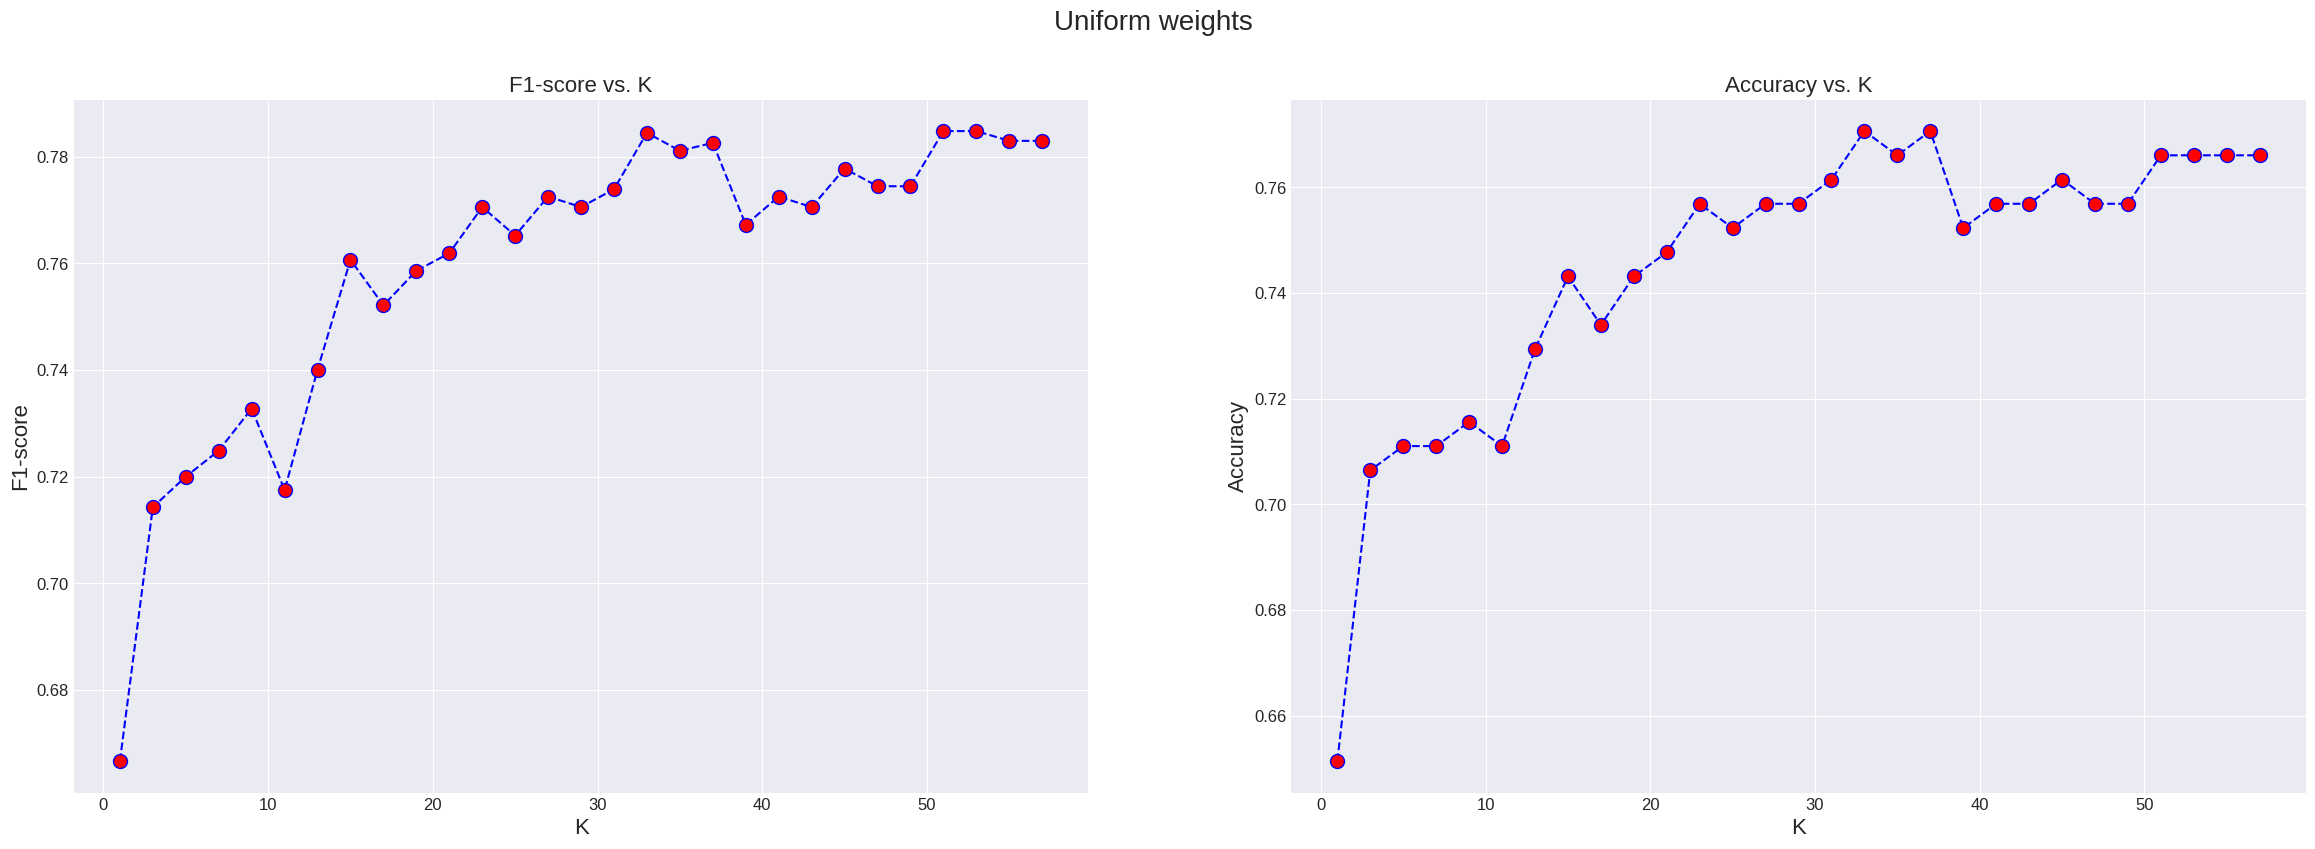

**Distance weights**

Best model scores for 2 features
Best model scores at K = 43
F1-score = 0.7706
Accuracy = 0.7569


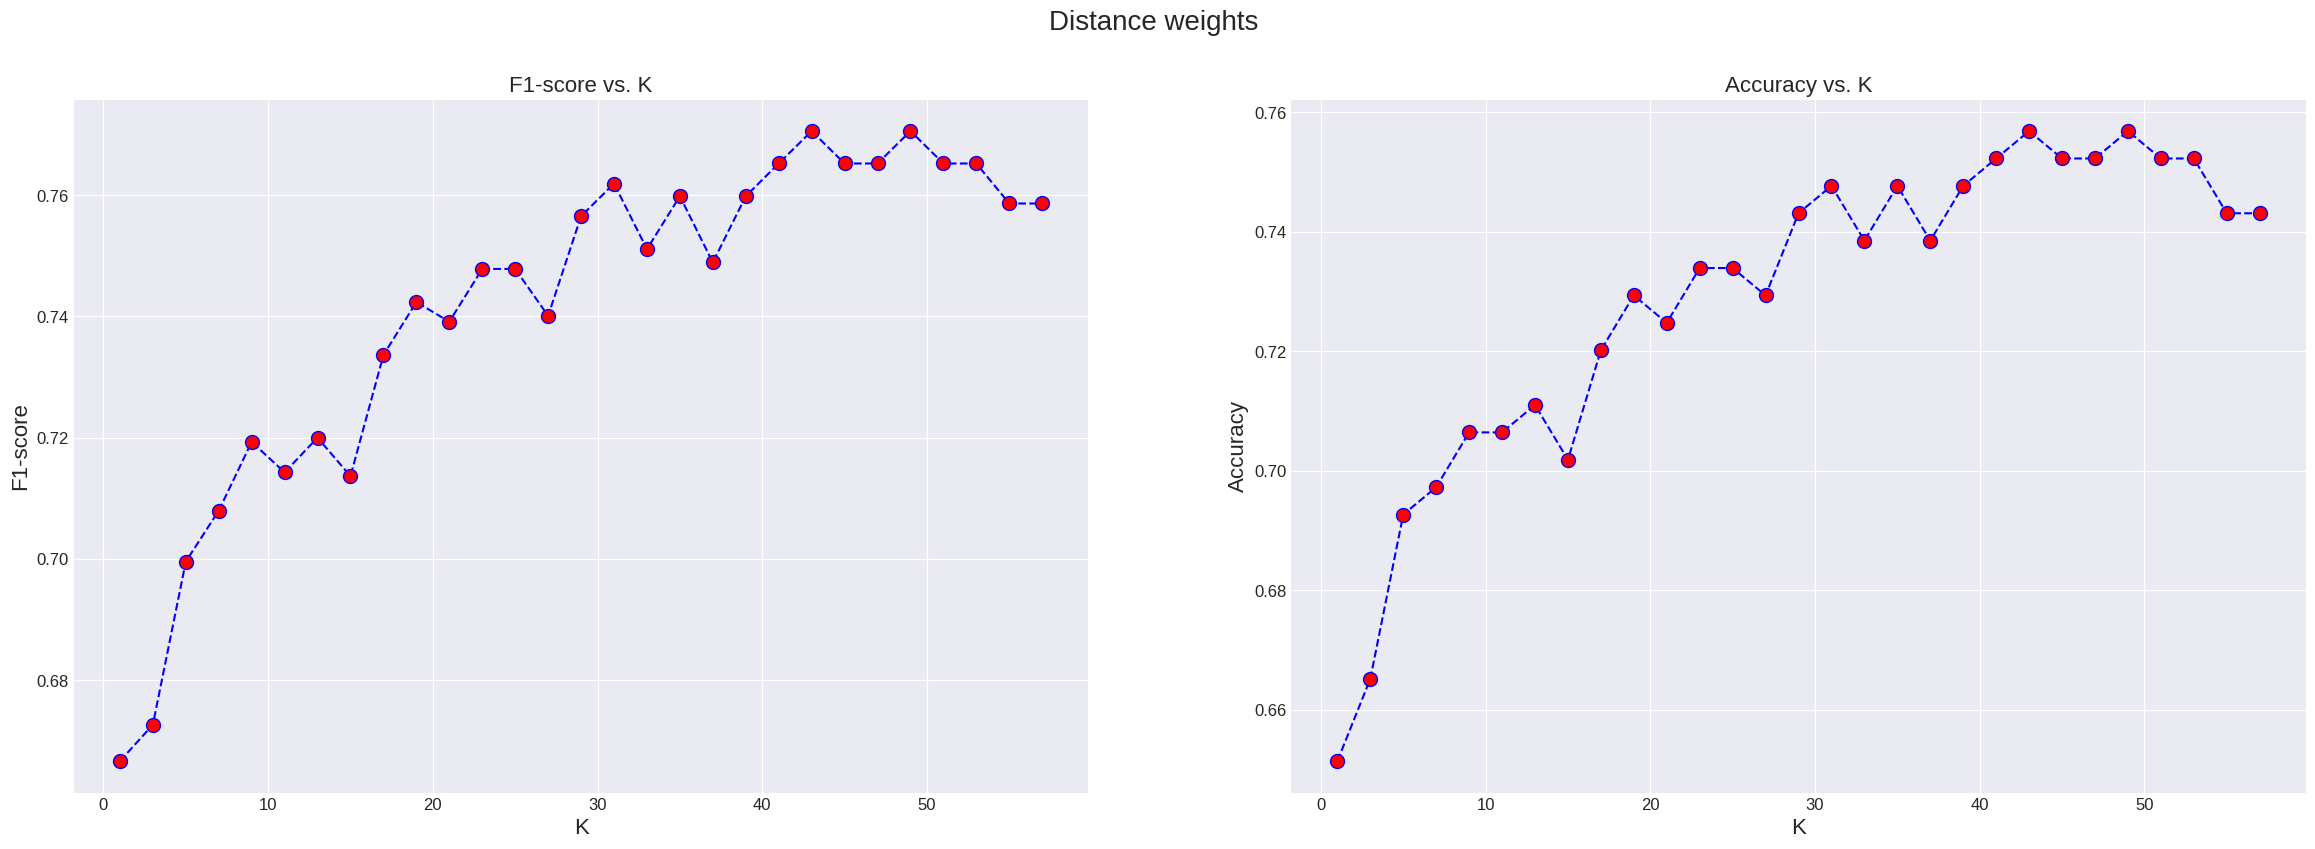

In [98]:
best_uniform_knn_model_sel, best_distance_knn_model_sel = best_models_knn_selected(feature_list, df_train_X, df_train_y, df_validation_X, df_validation_y)

In [99]:
feature_list[0:2]

['energy', 'acousticness']

As we can see above, for both cases (uniform and distance weights) we get a much better model using only 2 features: energy and acousticness *(based on the increased accuracy and f1 score)*. 
For uniform weights, the KNeighborsClassifier has the highest accuracy (+ f1 score) for 2 features.

Overall, these results support our hypothesis: *"Not all features are needed for classification / fewer features lead to a more accurate model"*. We can therefore drop the previous 'best' models trained on all features and choose the following model as the final model using the KNN algorithm:

- metric = euclidean metric
- features = ['energy', 'acousticness']
- weights = 'uniform'
- K = 33

We have decided on 'uniform' and not on 'distance' weights for two reasons:
1. Both accuracy and f1-score are about 1-3% higher using the uniform model
2. According to Occam's razor philosophy, simpler models are prefered: the uniform model has both, a lower $K$ value and a simpler calculation of the weights : $w_i = 1$, which makes this model simpler than the distance model.

The following figure shows the confusion matrix, including accuracy and f1 score for the best model using the KNN algorithm.

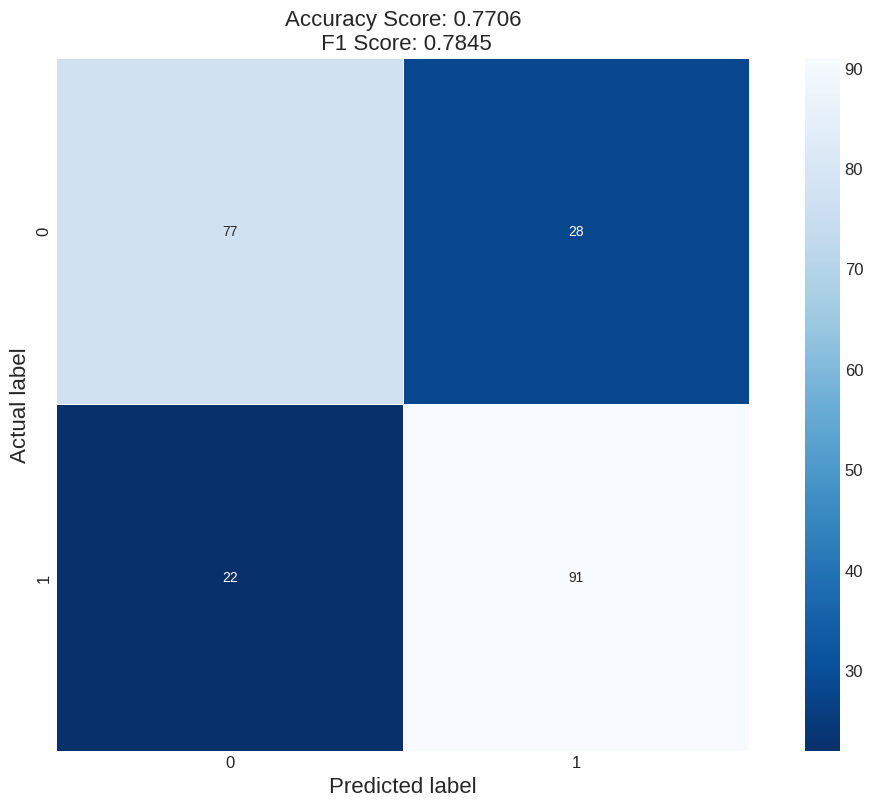

In [100]:
best_knn_model = best_uniform_knn_model_sel['model']

df_train_X_sel, df_validation_X_sel  = reduce_features(df_train_X , df_validation_X, feature_list[0:2])
acc_knn, f1_knn = get_clf_metrics(best_knn_model, df_validation_X_sel, df_validation_y, plot_conf_mx=True)

The confusion matrix above shows that the final KNN model misclassifies 50 out of 218 songs, with similar amounts of type 1 and type 2 errors.

## Decision tree

**Description**

*Name* \
$\quad$ Decision tree

*mathematical expression* \
$\quad$ Given a training set $x_0, \ldots, x_N$ with labels $y_0, \ldots , y_N$ the label $y$ of a new data point (represented by the $d$-dimensionl feature vector $x = [x^0, \ldots , x^{d-1}]$) can be calculated the following way: For a tree with $M$ many decision regions $R_m$ (leaf nodes) it is<div align="center">
$\displaystyle{y = \sum_{m=1}^M c_m I_{R_m}(x) \in \{0,1\}}$,</div>
where $I_{R_m}$ for $m \in \{1, \ldots , M \}$ describes the so-called indicator function <div align="center"> $\displaystyle{I_m : R_m \rightarrow \{0,1\}, ~ I_m(\iota) = \bigg\{\begin{array}{lr}
        0, & \iota \notin R_m\\
        1, & \iota \in R_m
        \end{array}}, $ 
</div>

and $c_m \in \{0,1\}$ is the class index for the given decision region (danceable or not). 

*To be noted:* $\forall x~ \exists ! ~ m \in \{1, \ldots , M\} : x \in R_m $.


*Hyperparameters* \
$\quad$ criterion - function to measure the quality of a split: gini (Gini impurity), entropy (information gain) \
$\quad$ splitter - strategy used to choose the split at each node \
$\quad$ max_depth - maximum depth of the tree \
$\quad$ min_samples_split - minimum number of samples required to split an internal node \
$\quad$ min_samples_leaf - minimum number of samples required to be at a leaf node \
$\quad$ min_weight_fraction_leaf - minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node \
$\quad$ max_features - number of features to consider when looking for the best split: integer, float, sqrt, log2  \
$\quad$ random_state - controls the randomness of the estimator \
$\quad$ max_leaf_nodes - maximum number of leaf nodes \
$\quad$ min_impurity_decrease - a node will be split if this split induces a decrease of the impurity greater than or equal to this value \
$\quad$ class_weight - weights associated with classes \
$\quad$ ccp_alpha - complexity parameter used for Minimal Cost-Complexity Pruning: the subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen


*Parameters* \
$\quad$ All non-leaf nodes \
$\quad$ Decision regions $R_m$ (leaf nodes) for $m \in \{1, \ldots , M\}$ \
$\quad$ A class index $c_m$ for each region $R_m$


*Parameter estimation* \
$\quad$ Iterative Dichotomiser 3 (ID3): creates a multiway tree, finding for each node the categorical feature that will yield the largest information gain for categorical targets \
$\quad$ C4.5: converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules, the accuracy of each rule is then evaluated to determine the order in which they should be applied \
$\quad$ C5.0: It uses less memory and builds smaller rulesets than C4.5 while being more accurate \
$\quad$ Classification and regression tree - CART: it supports numerical target variables (regression) and does not compute rule sets, CART constructs binary trees using the feature and threshold that yield the largest information gain at each node

First we are going to create models for different tree depth values without setting any other hyperparameters. We will train the models for a maximum depth of 2 to 20 and pick the model with the highest accuracy / f1-score.

In [101]:
dt_df = create_models('decision_tree', df_train_X, df_train_y, df_validation_X, df_validation_y, 2, 20)

Best model scores at depth of tree = 5
F1-score = 0.8472
Accuracy = 0.8394


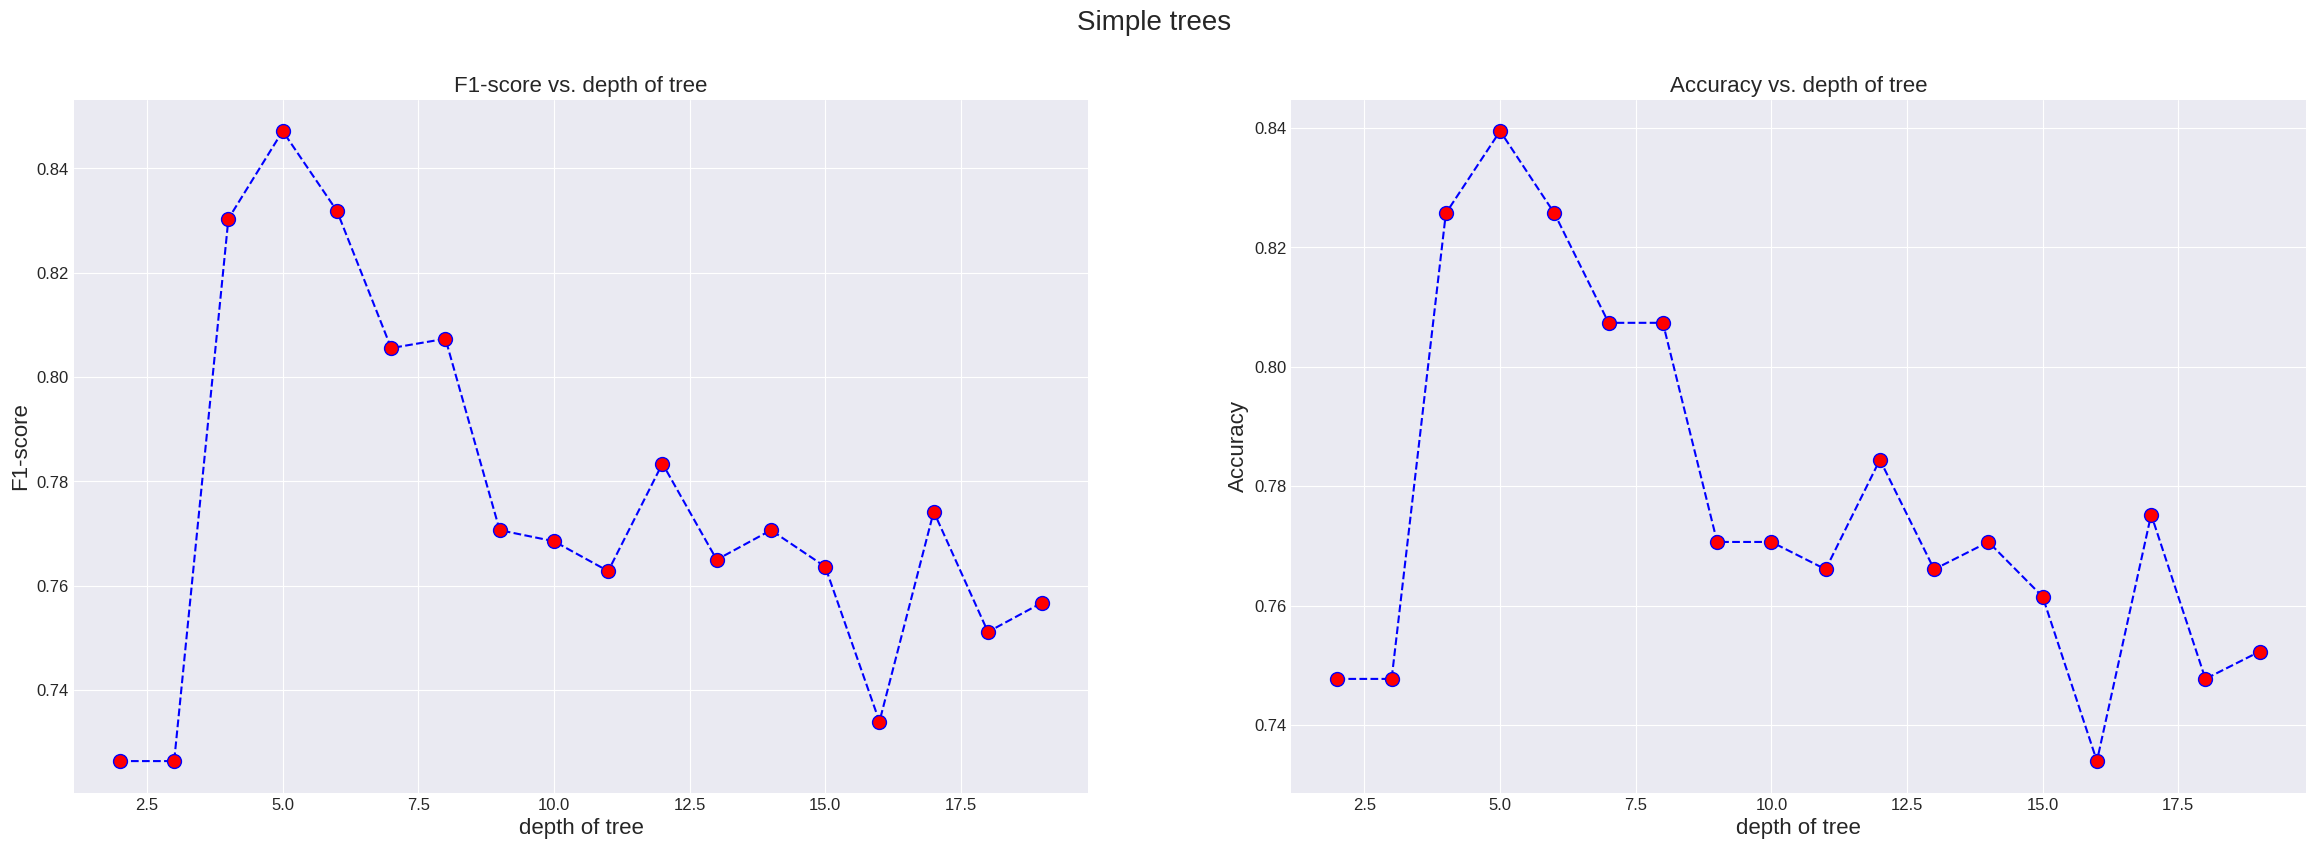

In [102]:
best_dt_model = plot_scores(dt_df, 'depth of tree', 'Simple trees')

The above plots show the f1-score and accuracy of decision tree models for different tree depths. All of the models have an f1-score and accuracy above 70% and the best result is obtained at a tree depth of 5 with both metrics above 84 %.
With a depth of 5, the model is not that complex and there are less splits compared to a deeper tree.

In [103]:
#get_clf_metrics(best_dt_model.model, df_validation_X.iloc[:, 3:], df_validation_y, plot_conf_mx=True)

In the next part we are going to tune the hyperparameters of the decision tree model to see if we can improve the model and get a better f1-score / accuracy.

We are trying out different values for the min_samples_leaf and min_samples_split parameters since these stopping criteria are some of the most common ones that are tuned when building a Decision Tree.

In [104]:
def get_best_dt_model(df_train_X, df_train_y, df_validation_X, df_validation_y, parameters, values):
    models = []
    combinations = list(itertools.permutations(values, len(parameters)))
    for i in combinations:
        dt_df = create_models('decision_tree', df_train_X, df_train_y, df_validation_X, df_validation_y, 2, 20, 
        **{parameters[0]:i[0], parameters[1]:i[1]})
        models.append(dt_df)
    models = pd.concat(models)
    best_model = select_best_model(models)
    
    return best_model

In [105]:
best_dt_model_params = get_best_dt_model(df_train_X, df_train_y, df_validation_X, df_validation_y,  
                    ['min_samples_leaf', 'min_samples_split'], [5, 10, 15, 20, 25, 30, 50])
best_dt_model_params.model

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=25)

By building models with different combinations of values for these two hyperparameters, we obtained the best metrics with min_samples_leaf=5 and min_samples_split=25 at a maximum tree depth of 5.

Next, we are going to plot the f1-score and accuracy for different tree depths to see how the models perform.

Best model scores at depth of tree = 5
F1-score = 0.8622
Accuracy = 0.8578


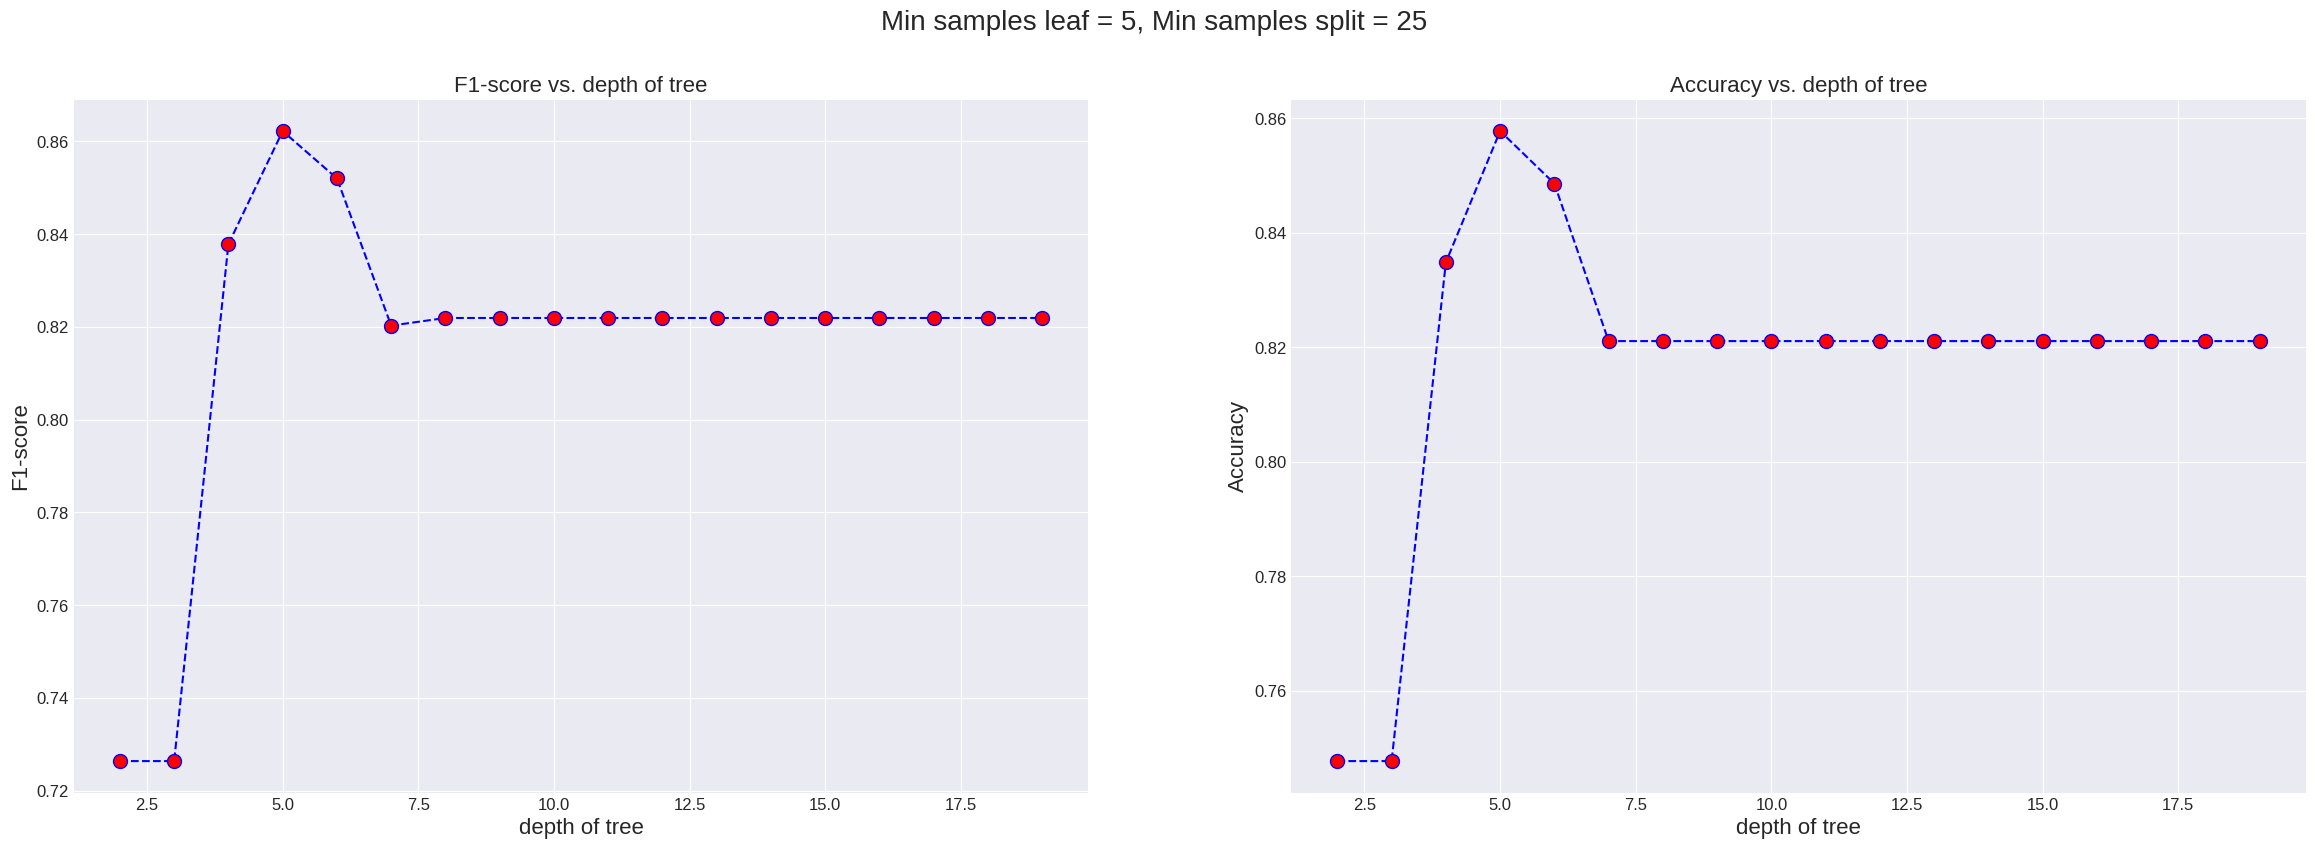

In [106]:
dt_df_best_params = create_models('decision_tree', df_train_X, df_train_y, df_validation_X, df_validation_y, 2, 20, min_samples_leaf=5, min_samples_split=25)
best_dt_model_params = plot_scores(dt_df_best_params, 'depth of tree', 'Min samples leaf = 5, Min samples split = 25')

As we can see, the best model has metrics above 85 % and the models with a tree depth above 7 have the same f1-score and accuracy. This can be the result of setting the other hyperparameters: the minimum number of samples required to split an internal node (min_samples_split) and to be at a leaf node (min_samples_leaf).

The following figure shows the confusion matrix, including accuracy and f1-score for the best model using the decision tree algorithm. The model correctly classified most songs with a similar amount of type 1 and type 2 errors.

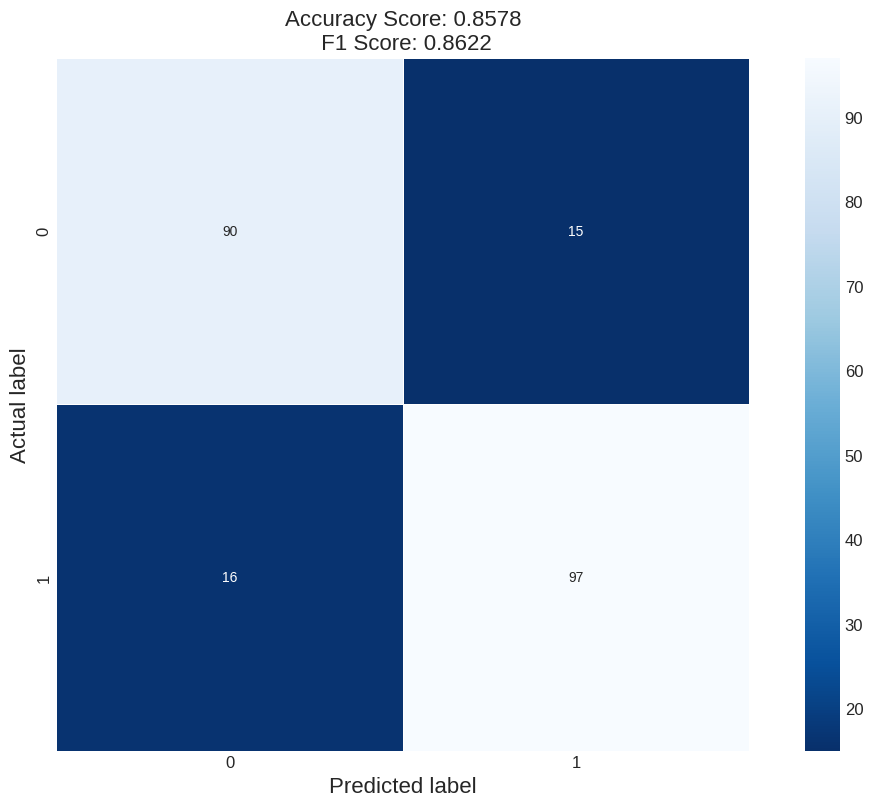

In [107]:
acc_dt, f1_dt = get_clf_metrics(best_dt_model_params.model, df_validation_X.iloc[:, 3:], df_validation_y, plot_conf_mx=True)

### Plot decision tree

In [110]:
def create_viz(dt, df_train_X, df_train_y, X=None, just_path=False, name=None):
    viz = dtreeviz(dt, 
                   df_train_X, df_train_y,
                   target_name='danceability',
                   feature_names=df_train_X.columns, 
                   class_names=['0', '1'],
                   orientation = 'TD',
                   X=X,
                   show_just_path=just_path
                  )
    if name:
        viz.save(name+".svg")
    return viz

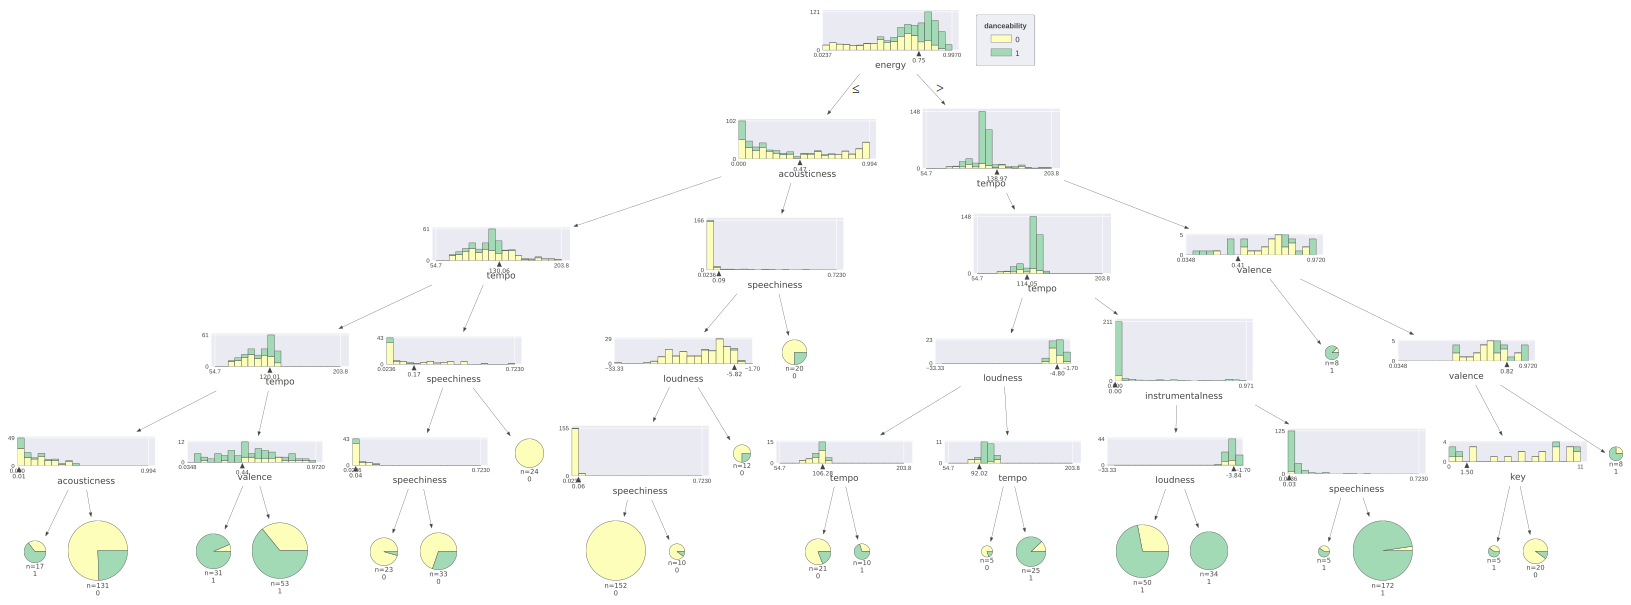

In [111]:
create_viz(best_dt_model_params.model, df_train_X.iloc[:, 3:], df_train_y, name='decision_tree')

In [112]:
df_train_X.iloc[0]

track_id            3Wrjm47oTz2sjIgck11l5e
artist_name                       Måneskin
track_name                         Beggin'
duration_ms                         211560
acousticness                         0.127
energy                                 0.8
instrumentalness                       0.0
key                                     11
liveness                             0.359
loudness                            -4.808
mode                                     0
speechiness                         0.0504
tempo                              134.002
time_signature                           4
valence                              0.589
Name: 1177, dtype: object

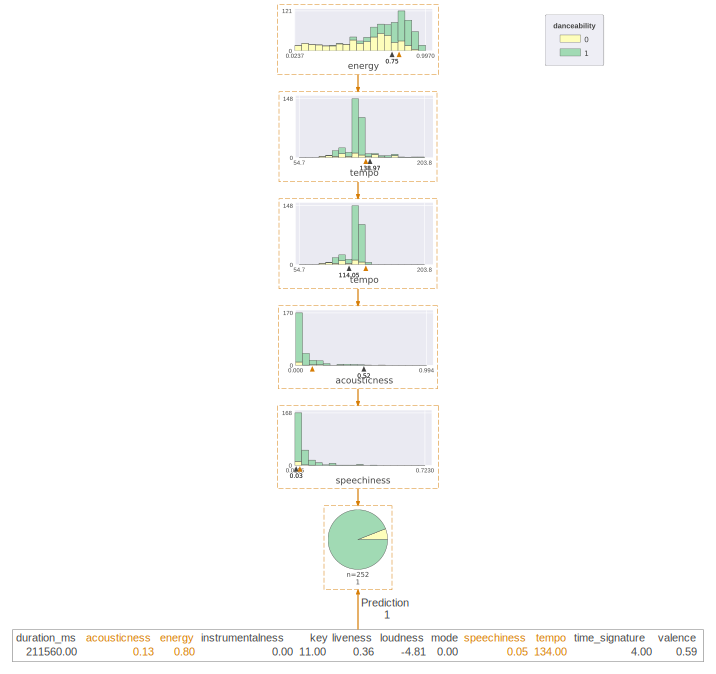

In [113]:
create_viz(best_dt_model.model, df_train_X.iloc[:, 3:], df_train_y, X=df_train_X.iloc[0, 3:], just_path=True, name='decision_tree_0')

## Testing

We will now finalize our classification model in order to make predictions on new, unseen data. We have previously trained two final models given two different algorithms:

**K-Nearest Neighbors**
- metric = euclidean metric 
- features = ['energy', 'acousticness']
- weights = 'uniform'
- K = 33
> Accuracy : 0.7706 \
> F1-Score : 0.7845

**Decision Tree**
- max_depth = 5
- min_samples_leaf = 5
- min_samples_split = 25
> Accuracy : 0.8578 \
> F1-Score : 0.8622

As our final model we are choosing the best model of the decision tree algorithm for the following two reasons:
1. Both accuracy and f1-score are about 7-9% higher for the decision tree model
Taking a step back and having a look at the results of the descriptive analysis part, we have seen, that many features are dependent / correlated to the danceability of a track. This observation leads us to the second reason why we choose the decision tree model over the KNN model:

2. The best KNN model only takes two features into account. Since we believe that most features are important for the classification of a song we prefer the decision tree model because all features are taken into consideration during training

In the following, we will test the final model, *Decision Tree*, using the test dataset and evaluate the performance. 

In [114]:
final_model = best_dt_model.model

test_x = test_df.iloc[:, 3:-1]
test_y = test_df['danceability']

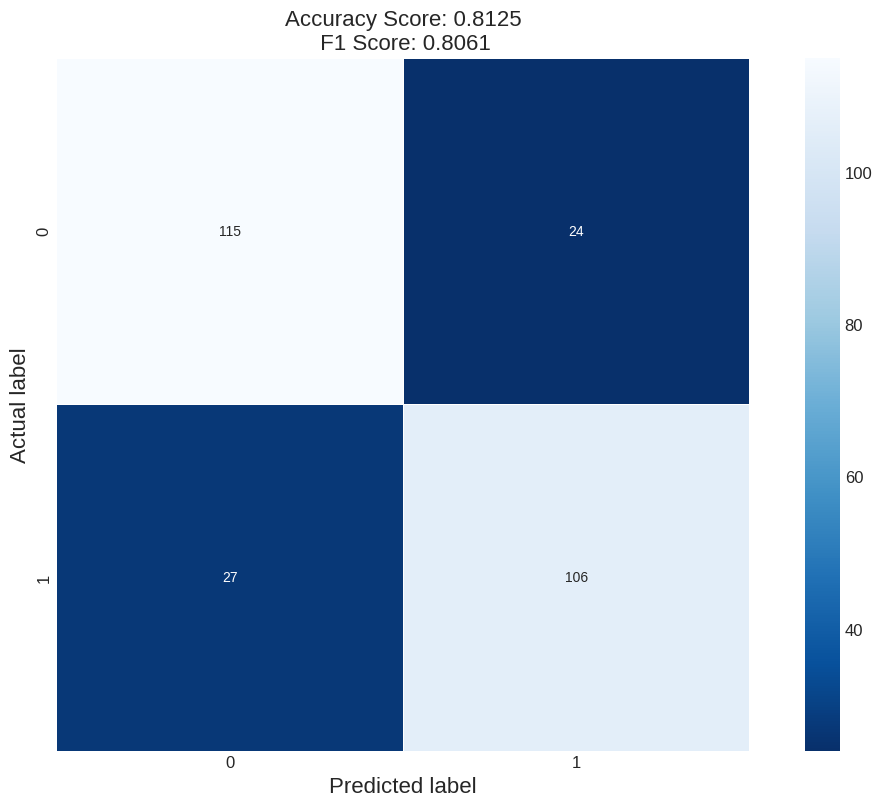

In [115]:
acc, f1 = get_clf_metrics(final_model, test_x, test_y, plot_conf_mx=True)

The chosen model using the decision tree algorithm performs well on unseen data / our test dataset. When applying the model to our test data we get accuracy and f1-score of above 80%. 
From the above scatterplot, we can derive that 49 out of 272 songs were misclassified, with similar amounts of type 1 and type 2 errors. \
 The table below shows all misclassified songs.

In [116]:
test_df['predicted_danceability'] = final_model.predict(test_x)
test_df[test_df['danceability'] != test_df['predicted_danceability']]

,track_id,artist_name,track_name,duration_ms,acousticness,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,danceability,predicted_danceability
1238,6J7WMB5GII6pEOzy687jhO,Ed Sheeran,Beautiful People (feat. Khalid) - NOTD Remix,162081,0.007150,0.794,0.000046,3,0.1100,-5.913,1,0.0562,103.972,4,0.3700,1,0
303,34chhNX59Wo9HMFCsI3K8Y,Kane Brown,Memory,153337,0.395000,0.889,0.000000,9,0.2730,-5.684,1,0.0509,113.326,5,0.8450,0,1
1267,5ow0sNF1zSqp71Ix5jEXWU,Jubël,Dancing in the Moonlight (feat. NEIMY),164009,0.270000,0.617,0.000000,11,0.1870,-5.862,0,0.0649,119.858,4,0.1870,1,0
1352,3Yqsx1OFZqPbULxXPLHlpq,Major Lazer,Cold Water (feat. Justin Bieber & MØ),185351,0.073600,0.798,0.000000,6,0.1560,-5.092,0,0.0432,92.943,4,0.5010,1,0
1276,3M9Apu4OZfylLTFKvgEtKa,Tiësto,Ritual,198995,0.157000,0.726,0.000000,3,0.0844,-4.389,0,0.0552,114.996,4,0.7670,1,0
1254,4Sp0jLZN8MgPnoGDufJS7N,Alan Walker,On My Way - Da Tweekaz Remix,204198,0.093400,0.848,0.000000,1,0.0925,-3.850,0,0.0431,149.936,4,0.4800,1,0
1179,6oJ6le65B3SEqPwMRNXWjY,Kygo,Higher Love,228267,0.015100,0.678,0.000006,8,0.1010,-7.159,1,0.0324,103.952,4,0.4040,1,0
1114,1dzQoRqT5ucxXVaAhTcT0J,Lady Gaga,Just Dance,241933,0.026400,0.739,0.000043,1,0.1810,-4.541,0,0.0311,118.992,4,0.7450,1,0
494,4cMXF5AmiAoUL8JW0j2l9M,LÉON,Who You Lovin,178626,0.007310,0.684,0.000025,9,0.1090,-5.277,0,0.0283,113.034,4,0.4850,0,1
198,2h9TDNEXRhcDIV3fsoEVq9,Sam Fischer,What Other People Say,194890,0.158000,0.472,0.000000,7,0.1210,-8.084,1,0.0399,126.904,4,0.2400,0,1


# Conclusion

In this project, we have worked with Spotify data in order to find the best songs for a party. The collected Spotify data consists of in total 1359 songs: 
- training: 1087 tracks [869 for training and 218 for validation]
- testing: 272 tracks
For each song we collected 12 different song features: 'energy',
 'acousticness',
 'loudness',
 'mode',
 'valence',
 'duration_ms',
 'liveness',
 'tempo',
 'instrumentalness',
 'time_signature',
 'key',
 'speechiness', and decided on a ground truth label for the 'danceability' feature based on the playlist we derived the song from. 

In order to train the best model given our objective and the available time, we extensively analyzed / visualized the dataset using different methods:
- histograms
- correlation matrices
- bar plots and pie charts
- dependence scatterplots
- dependence mosaic plots

During the visualization of the training dataset, we started to develop various hypotheses and tested a few of those using for example the Chi-Square test of independence (mode and danceability are independent) and the two-sample t-test (more people dance to non-acoustic music). In both cases, we failed to reject the null hypothesis given a significance level of 0.05. 
\
To get a better grasp of some song features, i.e. loudness, energy, and valence, we tried to find a theoretical distribution that describes the data / feature best. In particular, for the valence feature, we found a theoretical distribution: the beta distribution, which fits the data very well.

In the last part of this report, we applied two predictive machine learning models, *K-Nearest Neighbors* and *Decision Trees*, to solve our problem of finding the best songs to dance to. Based on the performance of each model and our domain knowledge, we decided on one final model. 
The final model, using the decision tree algorithm, performed quite well on our test dataset / on unseen data with an accuracy of about 82%. 

Due to the high accuracy score, it can be said, that our model, to classify a song as danceable or not, is reliable. Because of the great performance, we would recommend the model to party organizers and artists / producers as mentioned in the introduction. 

## Next Steps

If we would have more time for the project, there are several ways to improve the two predictive machine learning models:

**K-Nearest Neighbors:**
Since we are dealing with mixed categorical and numerical values we could improve the KNN algorithm by creating our own distance function which takes into account that some values are categorical.

**Decision Tree:**
To improve the model using the decision tree algorithm, we could also tune different hyperparameters other than the ones we tried, for example, the criterion, splitter or max_features. We could also apply the ensemble method *random forest*. Compared to decision trees, random forest results in significantly lower variance with slightly increased bias and is, in general, less interpretable.

Not only the model training / parameter estimation can be improved but also the initial **data collection:** As mentioned before, our data collection and especially the creation of ground truth labels does show some flaws. Instead of deciding on a danceability label based on the playlist we derive a song from, we could decide on a ground truth label based on other metrics: For example, one could count the people on the dance floor of a party and decide on a danceability label for each song based on the number of people dancing. Another way could be, to gather survey data where participants can label a song as danceable or not-danceable. 

The two described metrics above could also be used to **evaluate the performance** of our model, given the objective of finding the best songs for a party. If possible, we would like to collect feedback from people at the party by either building a simple app where people can react to each song with an emoji - thumbs up / down or observe, how many people are on the dance floor.

Further, an improvement could be, to simply enrich the **dataset**. We would like to collect more songs (10,000 and above) from various categories and genres to improve our classification model.

As said in the "Setup" part, our dataset is *not* valid forever and needs constant updates. Due to the ever-changing music, songs that are danceable now might not be classified as danceable forever. In order for this model to be valid for longer, one needs to constantly update the dataset and train the model with new, changed data.